In [ ]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [1]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# !pip install autoviz
# !pip install --pre pycaret

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
import category_encoders as ce
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lars
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from IPython.display import Image
from sklearn.ensemble import GradientBoostingRegressor
import category_encoders as ce
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import ShuffleSplit

from scipy.stats.mstats import winsorize
from catboost import CatBoostRegressor
from sklearn.metrics import PredictionErrorDisplay
from pycaret.regression import *
from sklearn.tree import DecisionTreeRegressor
import math

Описание данных
Признаки датасета (фичи)

carat - вес бриллианта в каратах (диапазон от 0,2 до 5,01)

cut - качество огранки бриллианта (Fair, Good, Very Good, Premium, Ideal)

color - цвет бриллианта (J - худший до D - лучший)

clarity - чистота камня, от худшего к лучшему - 'I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'

depth - общая глубина в процентах = height/mean(length,width) (диапазон от 43 до 79)

table - ширина вершины бриллианта относительно самого широкого места (диапазон от 43 до 95)

price - цена в долларах США (диапазон от 326 до 18,823 $)

length (x) - длина в мм (от 0 до 10,74)

width (y) - ширина в мм (от 0 до 58,9)

height (z) - высота/глубина (от 0 до 31,8)

### Область работы 2 (поиск  модели .... )

In [3]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВАЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv'# содержит только имя файла, без имен папок !!!

In [4]:
df = pd.read_csv(path_train)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145179 entries, 0 to 145178
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    145179 non-null  float64
 1   cut      145179 non-null  object 
 2   color    145179 non-null  object 
 3   clarity  145179 non-null  object 
 4   depth    145179 non-null  float64
 5   table    145179 non-null  float64
 6   x        145179 non-null  float64
 7   y        145179 non-null  float64
 8   z        145179 non-null  float64
 9   price    145179 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 11.1+ MB


In [6]:
df.describe()

,carat,depth,table,x,y,z,price
count,145179.000000,145179.000000,145179.000000,145179.000000,145179.000000,145179.000000,145179.000000
mean,0.791300,61.820854,57.229656,5.716450,5.721229,3.535055,3972.751996
std,0.463331,1.082079,1.920026,1.110629,1.103516,0.690620,4036.300085
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,948.000000
50%,0.700000,61.900000,57.000000,5.710000,5.720000,3.530000,2409.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,70.000000,9.650000,10.010000,31.300000,18818.000000


In [7]:
# отбор всех сторок с нулевым. значением в любом месте колонки
df[df.eq(0).any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price
28099,2.17,Premium,H,SI2,60.3,57.0,8.42,8.36,0.0,15923
44199,0.71,Very Good,F,SI2,62.0,60.0,0.00,6.71,0.0,2130
81538,2.20,Premium,I,SI2,60.1,60.0,8.45,8.41,0.0,11221
95099,0.71,Good,F,SI1,64.1,60.0,0.00,0.00,0.0,2130
110571,2.18,Premium,H,SI2,59.4,60.0,8.46,8.41,0.0,15842
127686,2.18,Premium,H,SI2,60.8,59.0,8.42,8.38,0.0,13938


In [8]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']


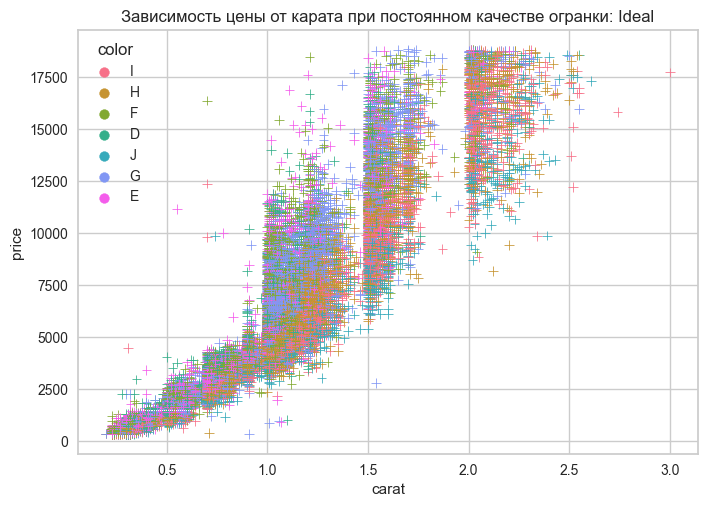

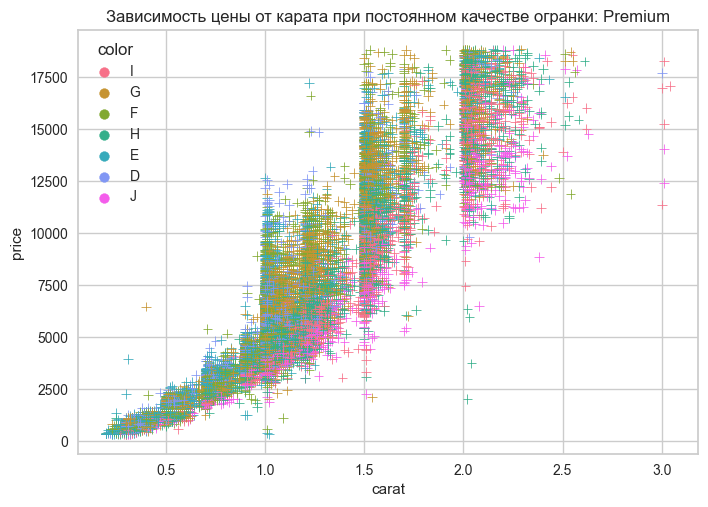

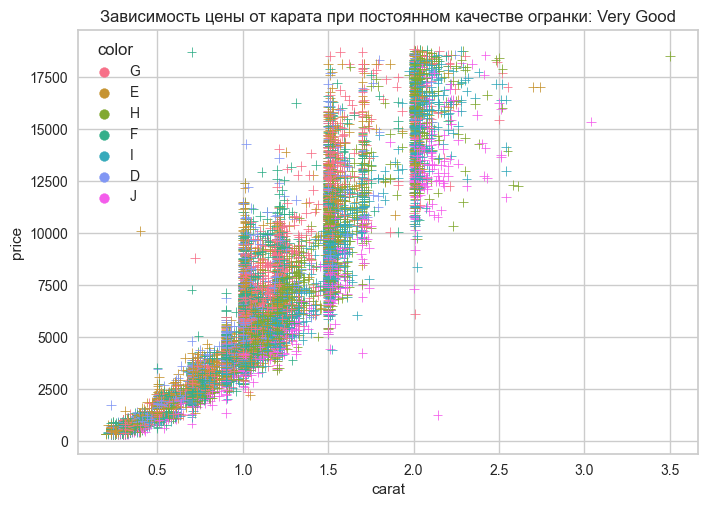

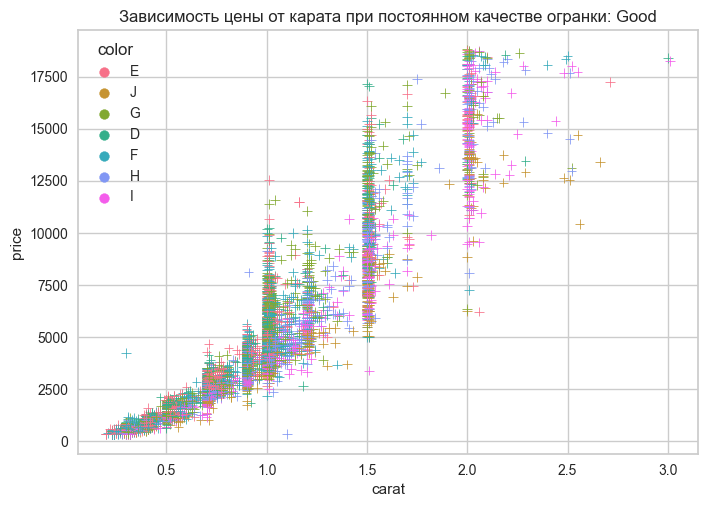

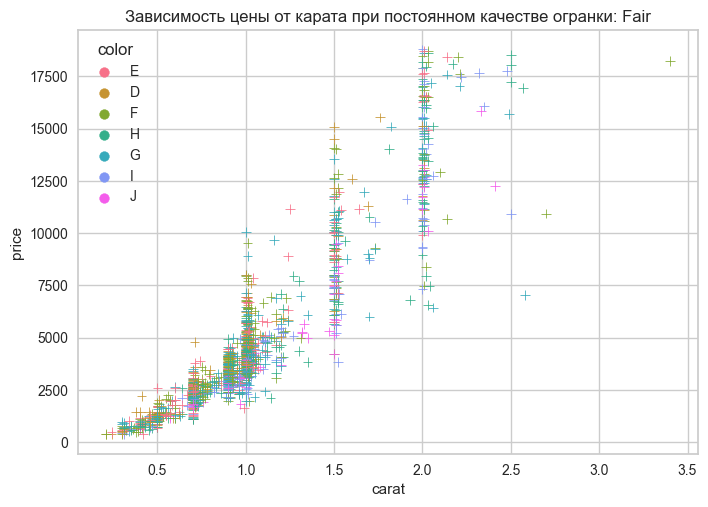

['I', 'H', 'G', 'E', 'F', 'D', 'J']


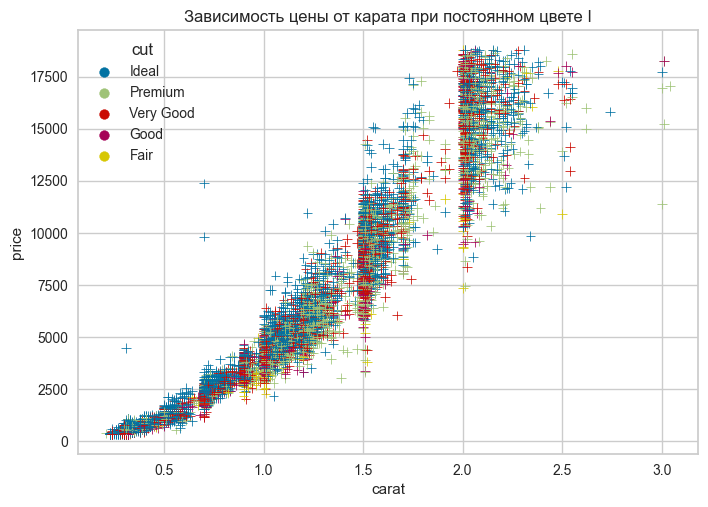

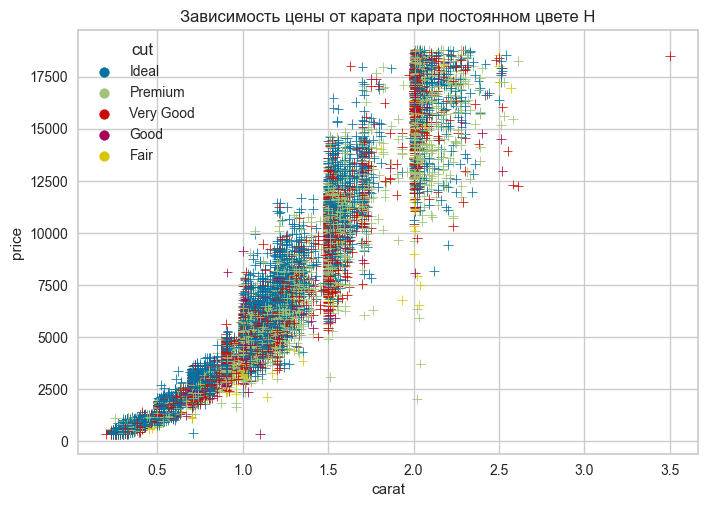

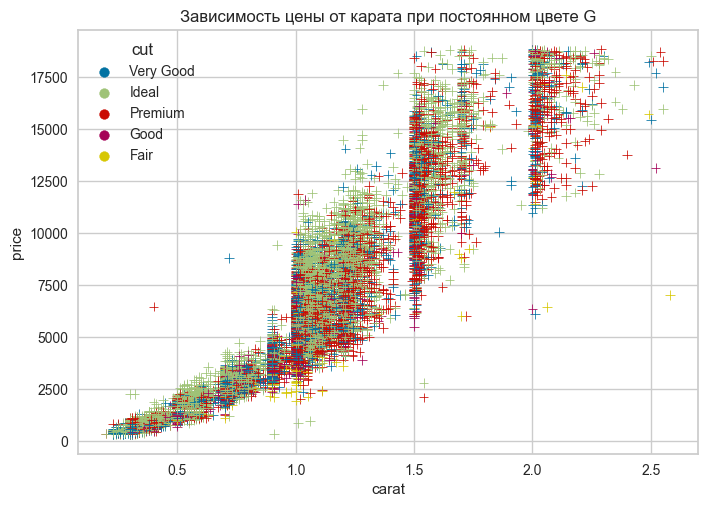

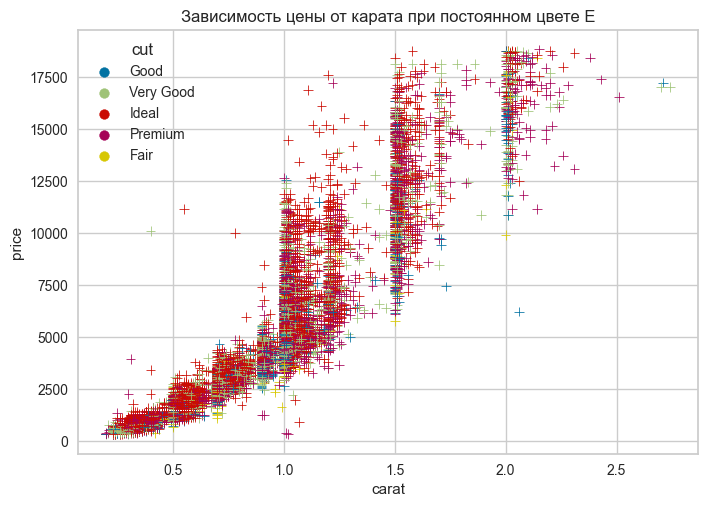

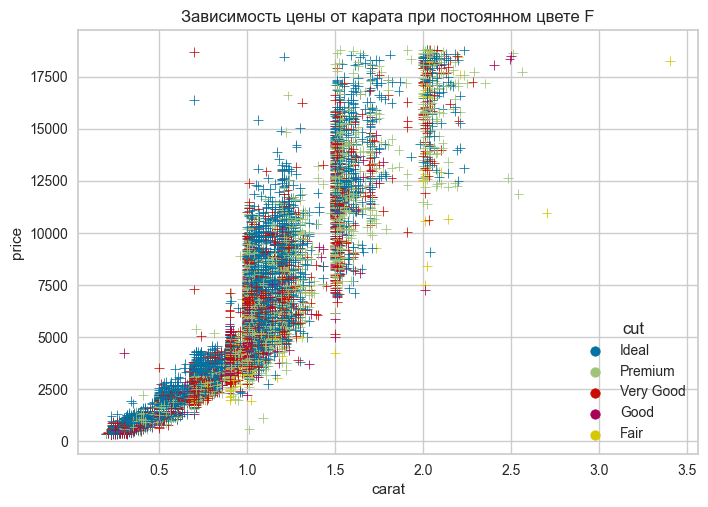

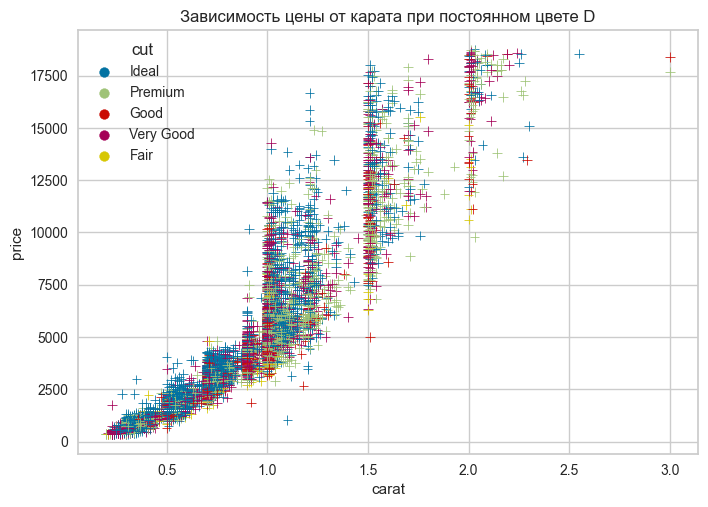

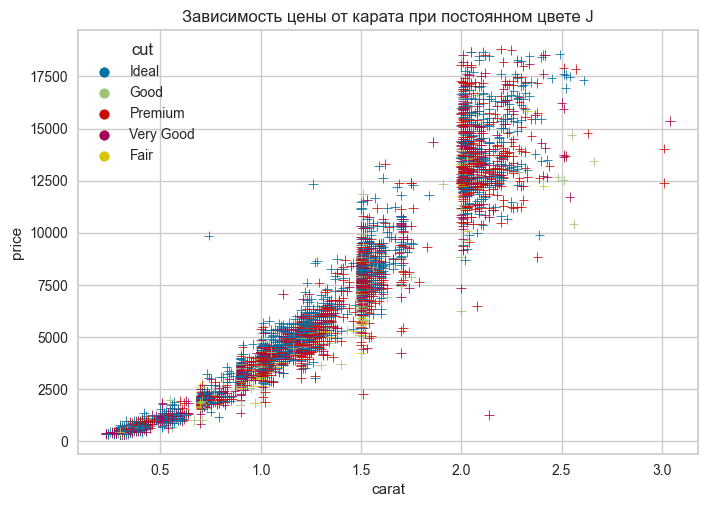

In [9]:
cut_list = list(df['cut'].unique())
print(cut_list)
for i in cut_list:
    cut_name = i
    df_var = df[df['cut'] == cut_name]
    plt.title("Зависимость цены от карата при постоянном качестве огранки: " + cut_name)
    sns.scatterplot(x= df_var['carat'], y = df_var['price'], hue = df_var['color'],marker="+")
    plt.show()
    

color_list = list(df['color'].unique())
print(color_list)
for i in color_list:
    color_list = i
    df_var = df[df['color'] == color_list]
    plt.title("Зависимость цены от карата при постоянном цвете " + color_list)
    sns.scatterplot(x= df_var['carat'], y = df_var['price'], hue = df_var['cut'],marker="+")
    plt.show()

In [10]:
# sns.pairplot(data = df, hue = 'cut') Долго считает

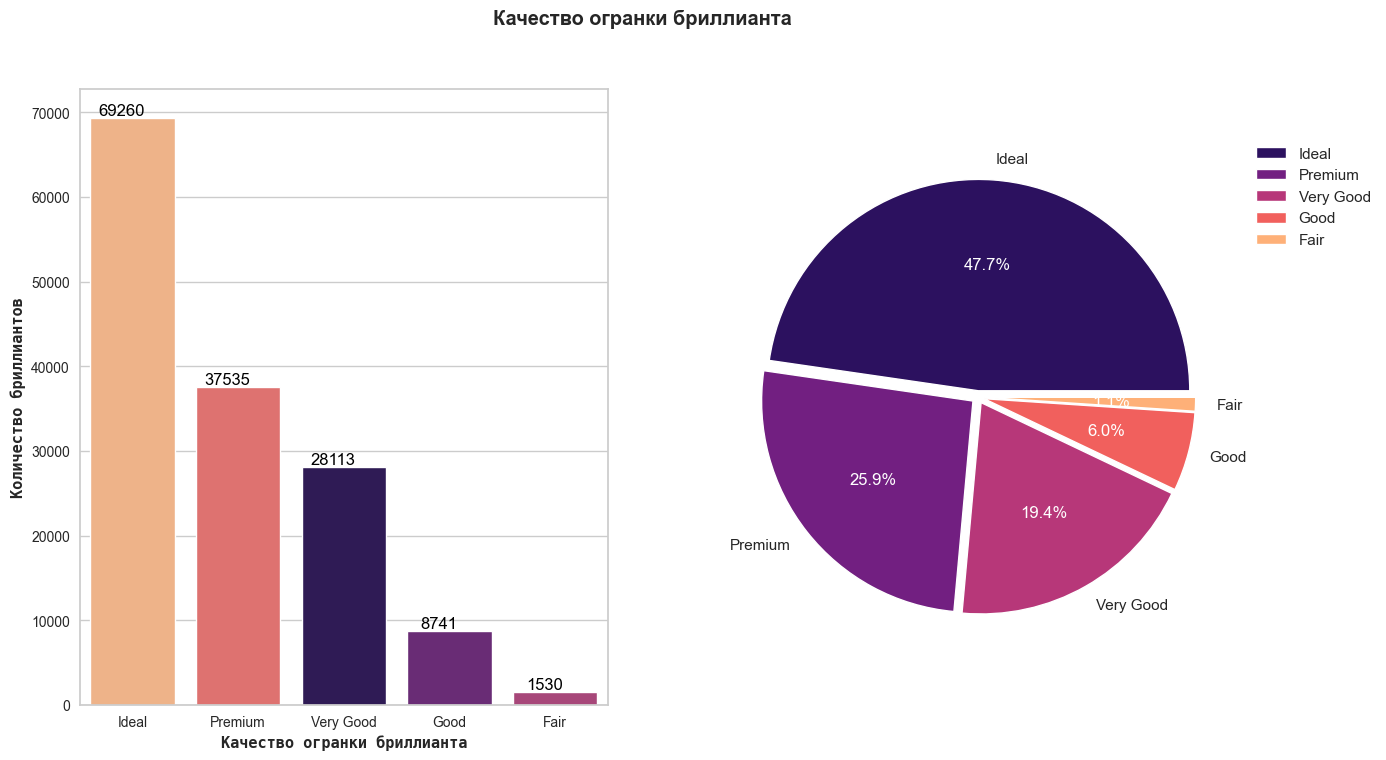

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['cut'].value_counts().index
y=df['cut'].value_counts().values.tolist()
data = df.groupby("cut").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Качество огранки бриллианта', weight='semibold', fontname = 'monospace')

ax[0].set_ylabel('Количество бриллиантов', weight='semibold', fontname = 'monospace')

_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['cut'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Качество огранки бриллианта',weight = 'bold')
plt.show()

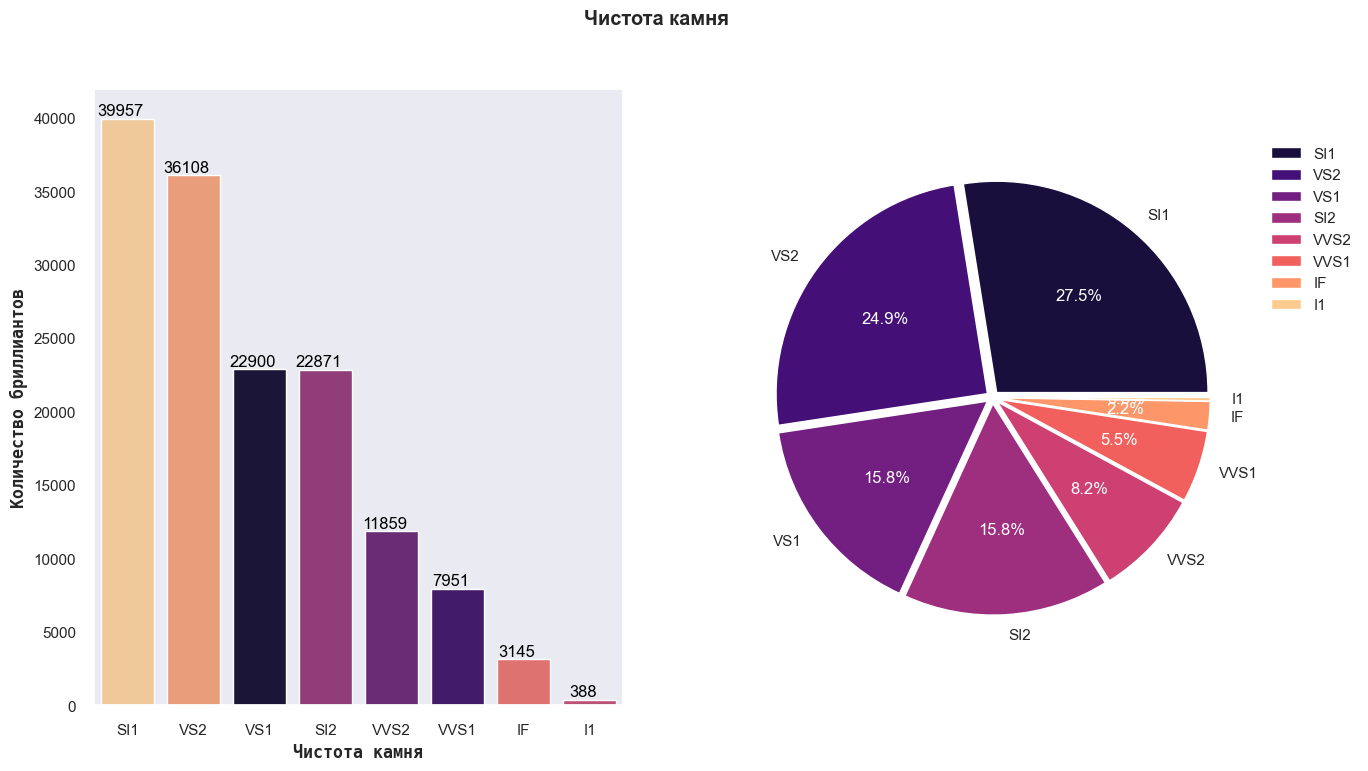

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
x=df['clarity'].value_counts().index
y=df['clarity'].value_counts().values.tolist()
data = df.groupby("clarity").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('Чистота камня', weight='semibold', fontname = 'monospace')

ax[0].set_ylabel('Количество бриллиантов', weight='semibold', fontname = 'monospace')

_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df['clarity'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('Чистота камня' ,weight = 'bold')
plt.show()

<AxesSubplot: >

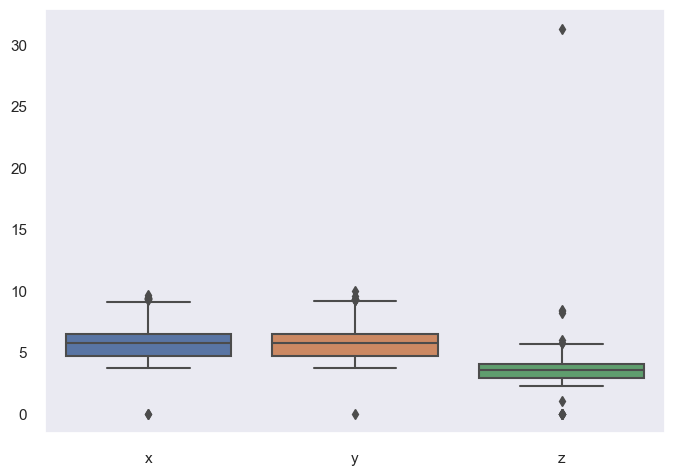

In [13]:
sns.boxplot(data = df[['x','y','z']])

Если посмотреть внимательно караты со значениями выбросов (слишком высокое значения z=31.3 и нулевые значения) можно убедиться, что данные можно восстановить (мы же знаем формулу depth = z/ mean(x,y) * 100 , соответственно из нее можно вывести любое число, будь нам нужно найти depth, или z, или x или y. ПОЭТОМУ СЛЕДУЮЩИЙ ПЛАН ПО РАБОТЕ С ВЫБРОСАМИ:

Для работы с пропусками мы:
1)  Заменим нулевые значения и HighValue в x,y,z:

А) Вначале по формуле;

Б) Остатки, там где пропущено два и более значений через KNNImputer в ColumnTransformere

2) Заметим, что выбросы есть не только в x,y,z, но и в других значениях. Так как выбросов много, было принято решение пройти по всем столбцам методом поиска аномалий

3) Сделать колонку is_anomaly, чтобы выделить на графике значения, которые являются аномальными (по мнению алгоритма)

4) Заменить аномальные значения через winsorize 

5) Не забыть провести аналогичную процедуру на test-датасете


Данная манипуляция была выполнена и я понял, что удаление выбросов лишь ухудшает качество прогнозов. 

После этого была опробована модель 3 сигм, я находил верхние и нижние пороги, и по ним масштабировал выбросы, однако и эта процедура не помогла. Даже при удалении <50 выбросов наша модель становиться хуже. Но ни как не лучше. 

Поэтому было принято решение, после замены нулевых значений и HighValue, заменить остальные пропуски KNNImputer и больше выбросы не трогать, ни к чему хорошему они не приведут, и на самом деле это не выбросы! 

In [14]:
# train_data.drop(119148, axis=0)

In [15]:
# ЭТОТ БЛОК ПОСВЯЩЕН НАХОЖДЕНИЮ НЕПРАВИЛЬНЫХ ЗНАЧЕНИЙ В X,Y,Z В TRAIN_DATA. БЛОК ПОМЕЩАЕТСЯ В НАЧАЛО РАБОТЫ
# отбор всех сторок с нулевым. значением в любом месте колонки
display(df[df.eq(0).any(axis=1)])
print('Еще увидим значение 1.05')
# Видели еще значение больше 0, но выделяющиеся проверим
display(df[df['z']<2])
print("Еще увидим значения в z> 6.5")
display(df[df['z']>6.5]) # тоже считаются выбросами значения больше 6.5, в x,y - это норма, но в z - нет, поэтому мы их
# заменим также через расчет z=(depth*mean(x,y))/100

# заменяем там где можно подсчитать математически
df.loc[28099, 'z'] = 5.1
df.loc[81538, 'z'] = 5.1
df.loc[110571, 'z']= 5.01
df.loc[127686, 'z'] = 5.1
df.loc[41748,'z'] = 4.04

df.loc[80198,'z'] = 5.1
df.loc[88644,'z'] = 4.87
df.loc[119299,'z'] = 5.15
df.loc[124083,'z'] = 3.13 # было 31.30 , опечатались

print("Оставшиеся строки, к которым мы будем применять KNNImputer на след шагах:")
display(df[df.eq(0).any(axis=1)])

#41748 z был равен 1.05, подсчитали z=4.042 ~ 4.04

#28099 - z=5.059 ~ 5.1
#81538 - z=5.066 ~ 5.1
#110571 - z= 5.010 ~ 5.01
#127686  - z=5.1072 ~ 5.11



# 80198 z=5.10
# 88644 z=4.872 ~ z =4.87
# 119299 z=5.15
# 124083 z=3.13



,carat,cut,color,clarity,depth,table,x,y,z,price
28099,2.17,Premium,H,SI2,60.3,57.0,8.42,8.36,0.0,15923
44199,0.71,Very Good,F,SI2,62.0,60.0,0.00,6.71,0.0,2130
81538,2.20,Premium,I,SI2,60.1,60.0,8.45,8.41,0.0,11221
95099,0.71,Good,F,SI1,64.1,60.0,0.00,0.00,0.0,2130
110571,2.18,Premium,H,SI2,59.4,60.0,8.46,8.41,0.0,15842
127686,2.18,Premium,H,SI2,60.8,59.0,8.42,8.38,0.0,13938


Еще увидим значение 1.05


,carat,cut,color,clarity,depth,table,x,y,z,price
28099,2.17,Premium,H,SI2,60.3,57.0,8.42,8.36,0.00,15923
41748,1.07,Ideal,H,SI1,61.3,57.0,6.57,6.62,1.05,5125
44199,0.71,Very Good,F,SI2,62.0,60.0,0.00,6.71,0.00,2130
81538,2.20,Premium,I,SI2,60.1,60.0,8.45,8.41,0.00,11221
95099,0.71,Good,F,SI1,64.1,60.0,0.00,0.00,0.00,2130
110571,2.18,Premium,H,SI2,59.4,60.0,8.46,8.41,0.00,15842
127686,2.18,Premium,H,SI2,60.8,59.0,8.42,8.38,0.00,13938


Еще увидим значения в z> 6.5


,carat,cut,color,clarity,depth,table,x,y,z,price
80198,2.10,Premium,H,I1,61.1,57.0,8.42,8.28,8.35,12512
88644,2.01,Premium,I,VS1,59.1,60.0,8.28,8.21,8.18,17640
119299,2.22,Ideal,G,VS2,61.8,57.0,8.36,8.32,8.40,18736
124083,0.51,Premium,G,VS2,61.8,58.0,5.20,5.13,31.30,1447


Оставшиеся строки, к которым мы будем применять KNNImputer на след шагах:


,carat,cut,color,clarity,depth,table,x,y,z,price
44199,0.71,Very Good,F,SI2,62.0,60.0,0.0,6.71,0.0,2130
95099,0.71,Good,F,SI1,64.1,60.0,0.0,0.00,0.0,2130


<AxesSubplot: >

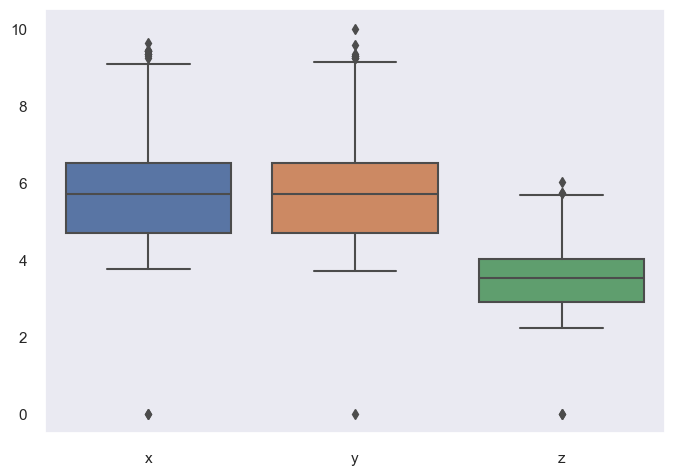

In [16]:
sns.boxplot(data = df[['x','y','z']])

### Ниже блоки посвящены методу 3х сигм, однако его я не включал в свою модель (выше объяснил почему)

In [17]:
# df_nums = df.drop(['cut','color','clarity'],axis=1)
# df_nums

In [18]:
# def outlier_std(df, column, multiplier=3):
#     mean = df[column].mean()
#     std = df[column].std()
#     lower_bound = mean - multiplier * std
#     upper_bound = mean + multiplier * std
#     outliers = ~df[column].between(lower_bound,upper_bound)
#     return outliers, lower_bound, upper_bound


# def anomalies_detection (df, columns=None, function=outlier_std, multiplier = 3):
#     if columns:
#         columns_check = columns
#     else:
#         columns_check = df.columns
#     anomalies_columns_table = {}
#     anomalies = pd.Series(False, index = df.index, name='anomalies')
#     for column in columns_check:
#         outliers, lower_bound, upper_bound = function(df, column, multiplier = multiplier)
#         anomalies[outliers[outliers].index] = True
#         ### True, False для расчета процентов вычисляем среднее :)
#         anomalies_columns_table[column] = [upper_bound, lower_bound, sum(outliers), 100*np.mean(outliers)]
#     anomalies_columns_table = pd.DataFrame(anomalies_columns_table).T
#     anomalies_columns_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_pct']
#     return anomalies_columns_table, anomalies

# def anomalies_report(anomalies):
#     return print("Аномалий: {}\nПроцент аномалий:   {:.2f}%".format(sum(anomalies), 100*np.mean(anomalies))) 

# std_data = df_nums.copy()
# anomalies_columns_table, anomalies = anomalies_detection(std_data, multiplier = 7)    
# std_data['is_anomalies'] = anomalies


# display(anomalies_columns_table)
# anomalies_report(anomalies)
# display(std_data)


In [19]:
# sns.pairplot(data = std_data, 
#              hue='is_anomalies', hue_order=[1, 0], 
#              diag_kind="kde",
#              diag_kws=dict(common_norm=False), # этот параметр отменяет общую нормировку площади =1
#              markers=['o','X'],  palette='bright');

In [20]:
# for col in std_data.iloc[:,:-1]:
#     std_data[col] = np.where(std_data[col]>anomalies_columns_table.loc[col]['upper_bound'], anomalies_columns_table.loc[col]['upper_bound'], std_data[col])
#     std_data[col] = np.where(std_data[col]<anomalies_columns_table.loc[col]['lower_bound'], anomalies_columns_table.loc[col]['lower_bound'], std_data[col])
# std_data

#### В блоке ниже (оставлю его закоменченным), я пробовал преобразовать наш таргет. Вначале с помощью логарифма np.log. Однако эффекта не последовало

#### Потом с помощью бокса-кокса (он по идее как должен хорошо приводить в нормальный вид экспоненциальные распределения), но и он не помог. Потом попробовал применять StandardScaler и MinMaxScaler (на MinMaxScaler было заметное небольшое улучшение модели). 

#### И потом остановился на корне из price. Так как он хоть и не изменил наше распределение на более нормальное, но видимо как-то упростил работу RandomForest-у и улучшил показатели в среднем на одну тысячу MSE (а это очень много в наше не простое время)

In [21]:
# train_data = pd.concat([std_data.drop(['is_anomalies'],axis=1), df[['cut', 'color', 'clarity']]], axis = 1)
# # train_data['price'] = np.log(train_data['price'])
# # train_data

# # train_data['price'] = stats.boxcox(train_data['price'], lmbda=0.055)
# # train_data

# # scaler = MinMaxScaler()
# # train_data['price'] = scaler.fit_transform(train_data[['price']])
# # # # price_scaled = scaler.fit_transform(train_data[['price']])
# # train_data.price

# # Заменяем значения столбца price на корень из значений
# train_data['price'] = train_data['price'].apply(np.sqrt)
# train_data


In [22]:
train_data = df.copy()

train_data['price'] = train_data['price'].apply(np.sqrt)
train_data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.01,Ideal,I,SI2,62.1,56.0,6.39,6.41,3.98,63.859220
1,1.08,Ideal,H,VS2,62.7,55.0,6.53,6.59,4.09,76.491830
2,2.02,Premium,I,VS2,59.8,60.0,8.20,8.28,4.92,127.996094
3,0.32,Very Good,G,SI1,63.0,56.0,4.33,4.36,2.74,21.840330
4,0.74,Good,E,SI2,63.4,64.0,5.76,5.71,3.63,49.000000
...,...,...,...,...,...,...,...,...,...,...
145174,0.50,Very Good,E,SI1,60.2,61.0,5.11,5.15,3.09,37.549967
145175,1.91,Very Good,F,SI1,62.3,62.0,7.85,7.79,4.87,122.735488
145176,1.22,Premium,G,VS2,62.8,58.0,6.82,6.74,4.26,84.905830
145177,0.31,Very Good,G,VVS1,61.1,56.0,4.37,4.40,2.67,28.565714


<AxesSubplot: >

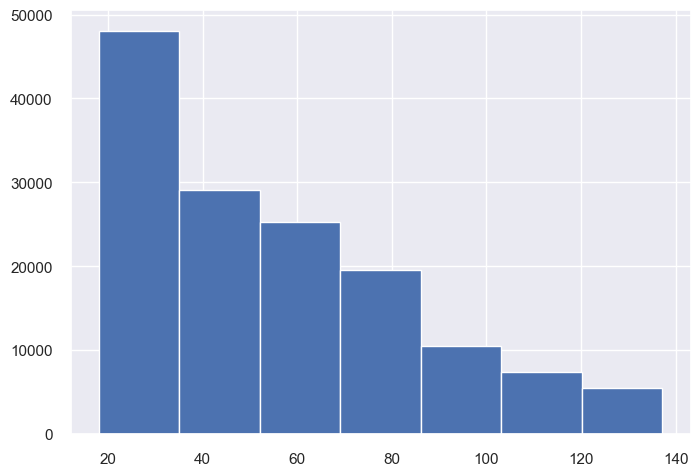

In [23]:
train_data.price.hist(bins=7)

### Ниже представлен код по которому мы строим самую замечательную гистограмму carat-ов.

#### При разбивке по 0.01 карат, можно заметить выделенные блоки, в которые входит большое количество бриллиантов, а далее блоки содержащие меньшее количество бриллиантов. И как только порог переступает какое целое количество каратов (1, 1,5 и тд), то их количество снова большое

#### Также по красной линии вы видите средний таргет. Который имеет заметный рост при переходе в округленный карат, то есть заметен резкий рост цены между каратами 0.99 и 1, и это много о чем говорит.

#### Было принято решение применить биннинг (вручную), в котором мы все эти караты разобьем на 10 блоков. Собственно согласно вертикальным линиям, размещенным на графике.

#### Например, значения от 2 до 2.49 идут в бин 2 , а от 2.5 до 3 - в 2.5, и так далее

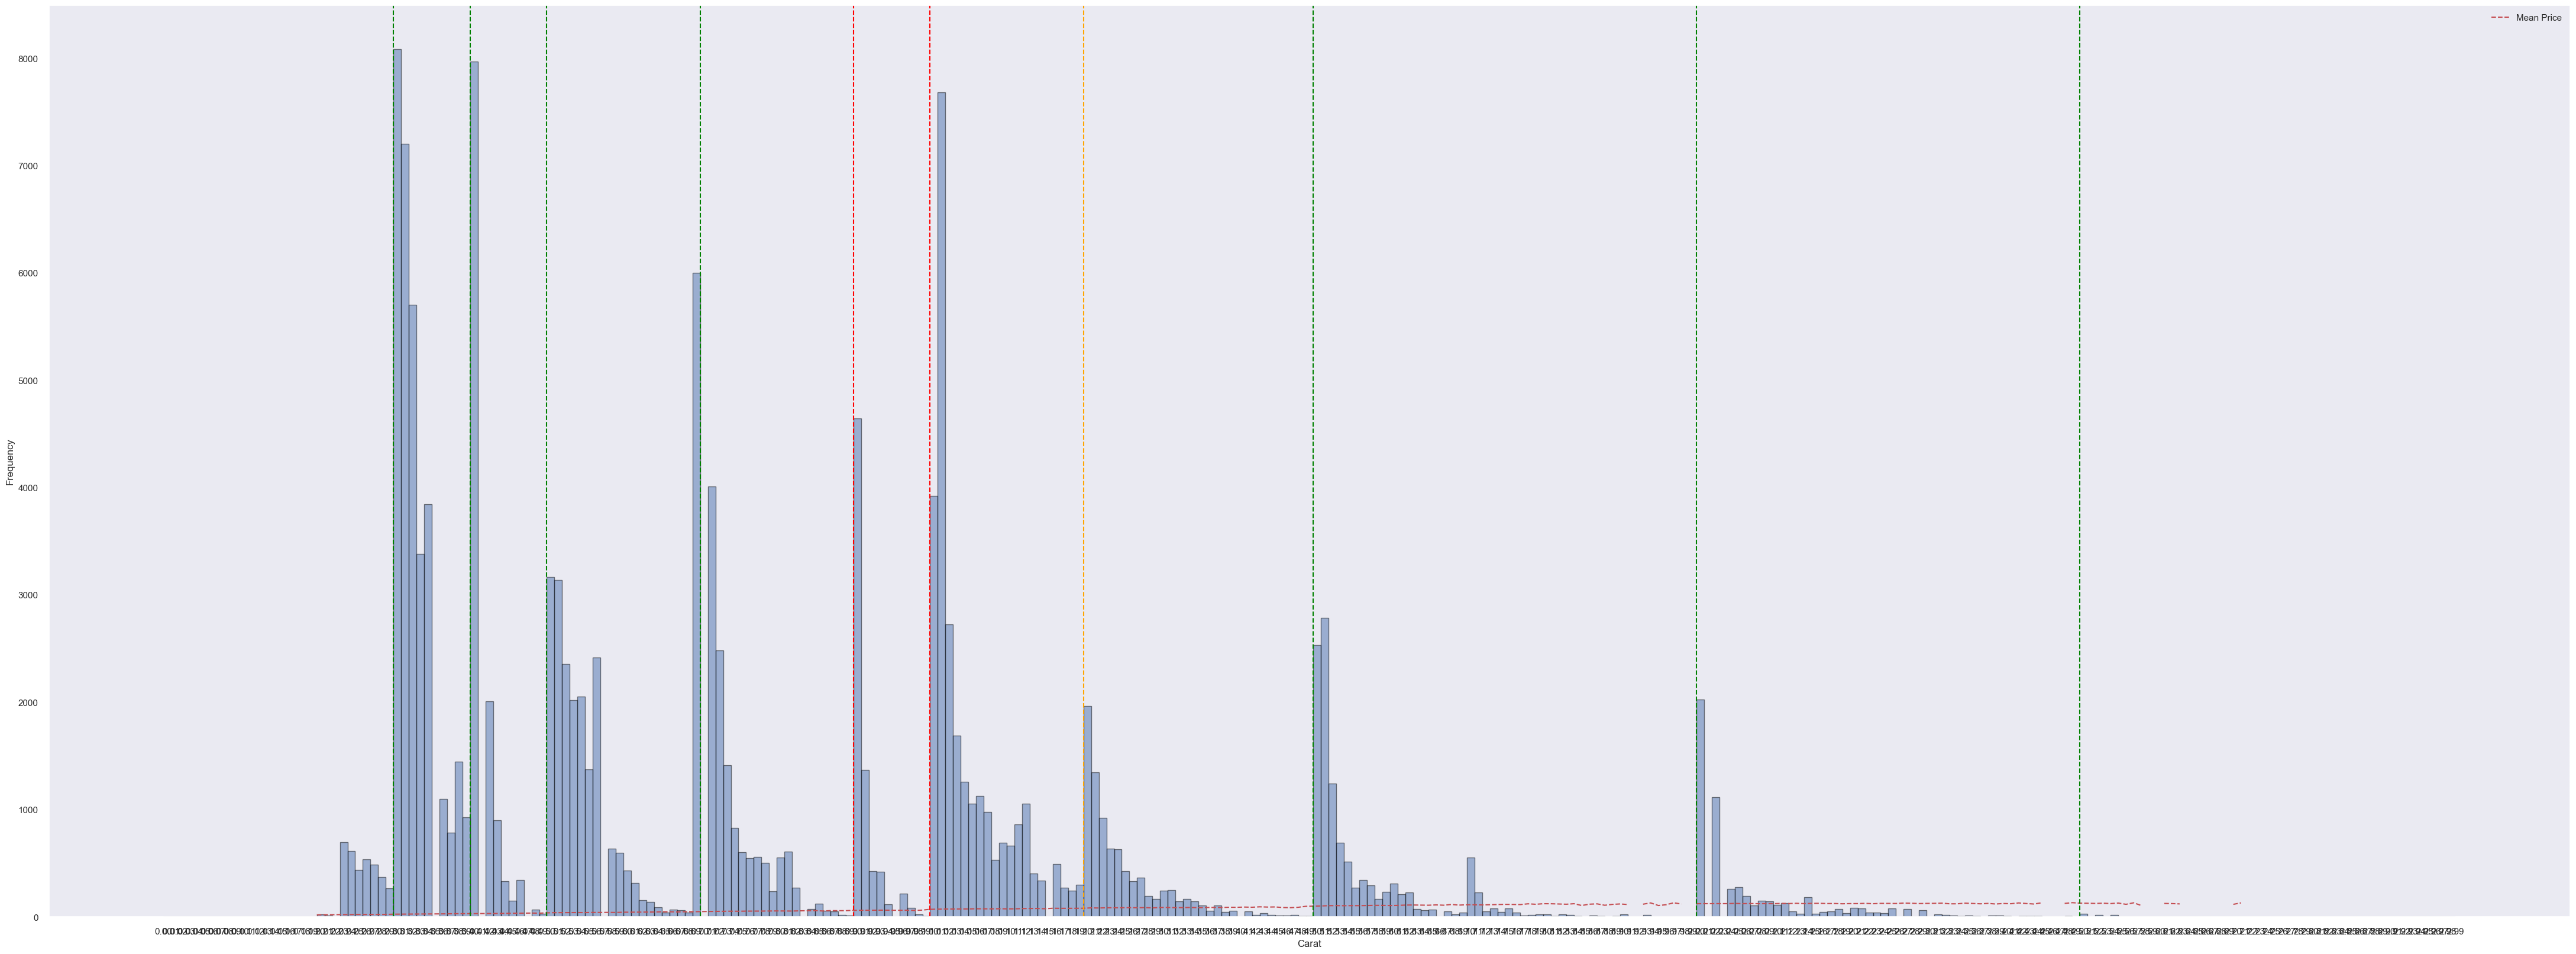

In [24]:
# задаем границы бинов
bin_edges = np.arange(0, 3, 0.01)

# создаем бины переменной carat
bins = pd.cut(train_data['carat'], bins=bin_edges)

# вычисляем среднее значение price в каждом бине
mean_price = train_data.groupby(bins)['price'].mean()

# создаем новый график с размером 15x10
plt.figure(figsize=(55,20))

# выводим гистограмму
n, bins, patches = plt.hist(train_data['carat'], bins=bin_edges, edgecolor='black', alpha=0.5   )

# добавляем график среднего значения price по каждому интервалу карата
plt.plot(bin_edges[1:], mean_price, 'r--', label='Mean Price')

# добавляем легенду
plt.legend()

# добавляем подписи к осям
plt.xlabel('Carat')
plt.ylabel('Frequency')

# форматируем ось x, чтобы отображать интервалы
plt.xticks(bins)

# Вставляем пунктирные линии на оси x в заданных точках
plt.axvline(x=0.3, color='green', linestyle='--')
plt.axvline(x=0.4, color='green', linestyle='--')
plt.axvline(x=0.5, color='green', linestyle='--')
plt.axvline(x=0.7, color='green', linestyle='--')
plt.axvline(x=0.9, color='red', linestyle='--')
plt.axvline(x=1, color='red', linestyle='--')
plt.axvline(x=1.2, color='orange', linestyle='--')
plt.axvline(x=1.5, color='green', linestyle='--')
plt.axvline(x=2, color='green', linestyle='--')
plt.axvline(x=2.5, color='green', linestyle='--')

# выводим график
plt.show()

In [25]:

# # создаем функцию для присвоения значений в новой колонке
# def assign_range(x):
#     if x >= 0.2 and x <= 0.29:
#         return 0
#     elif x >= 0.3 and x <= 0.39:
#         return 1
#     elif x >= 0.4 and x <= 0.49:
#         return 2
#     elif x>=0.5 and x <= 0.69:
#         return 3
#     elif x>=0.7 and x<= 0.89:
#         return 4
#     elif x>=0.9 and x<= 0.99:
#         return 5
#     elif x>=1 and x<= 1.19:
#         return 6
#     elif x>=1.2 and x<= 1.49:
#         return 7
#     elif x>=1.5 and x<=1.99:
#         return 8 
#     elif x>=2 and x<= 2.49:
#         return 9
#     else:
#         return 10

# # создаем новую колонку на основе значения колонки carat
# train_data['carat_bin'] = train_data['carat'].apply(assign_range)

Бинимизация в конечной модели начала ухудшать качество, поэтому решил ее не включать 

Мы не будем удалять исходный карат, просто его прологарифмируем

In [26]:
train_data['carat'] = np.log(train_data['carat'])

создадим колонку y/z , предварительно заменив нули на среднее по импутеру 

In [27]:


simpleimputer=  SimpleImputer(missing_values = 0, strategy = 'mean')

train_data[['x', 'y', 'z']] = simpleimputer.fit_transform(train_data[['x', 'y', 'z']])

train_data['y_z'] = train_data['y']/train_data['z']

train_data['y_z'] = simpleimputer.fit_transform(train_data[['y_z']])



In [28]:
train_data

,carat,cut,color,clarity,depth,table,x,y,z,price,y_z
0,0.009950,Ideal,I,SI2,62.1,56.0,6.39,6.41,3.98,63.859220,1.610553
1,0.076961,Ideal,H,VS2,62.7,55.0,6.53,6.59,4.09,76.491830,1.611247
2,0.703098,Premium,I,VS2,59.8,60.0,8.20,8.28,4.92,127.996094,1.682927
3,-1.139434,Very Good,G,SI1,63.0,56.0,4.33,4.36,2.74,21.840330,1.591241
4,-0.301105,Good,E,SI2,63.4,64.0,5.76,5.71,3.63,49.000000,1.573003
...,...,...,...,...,...,...,...,...,...,...,...
145174,-0.693147,Very Good,E,SI1,60.2,61.0,5.11,5.15,3.09,37.549967,1.666667
145175,0.647103,Very Good,F,SI1,62.3,62.0,7.85,7.79,4.87,122.735488,1.599589
145176,0.198851,Premium,G,VS2,62.8,58.0,6.82,6.74,4.26,84.905830,1.582160
145177,-1.171183,Very Good,G,VVS1,61.1,56.0,4.37,4.40,2.67,28.565714,1.647940


In [29]:
# train_data.groupby(['carat_bin'])['carat'].count().plot(kind='bar')

#### Для table я решил тоже проверить распределение

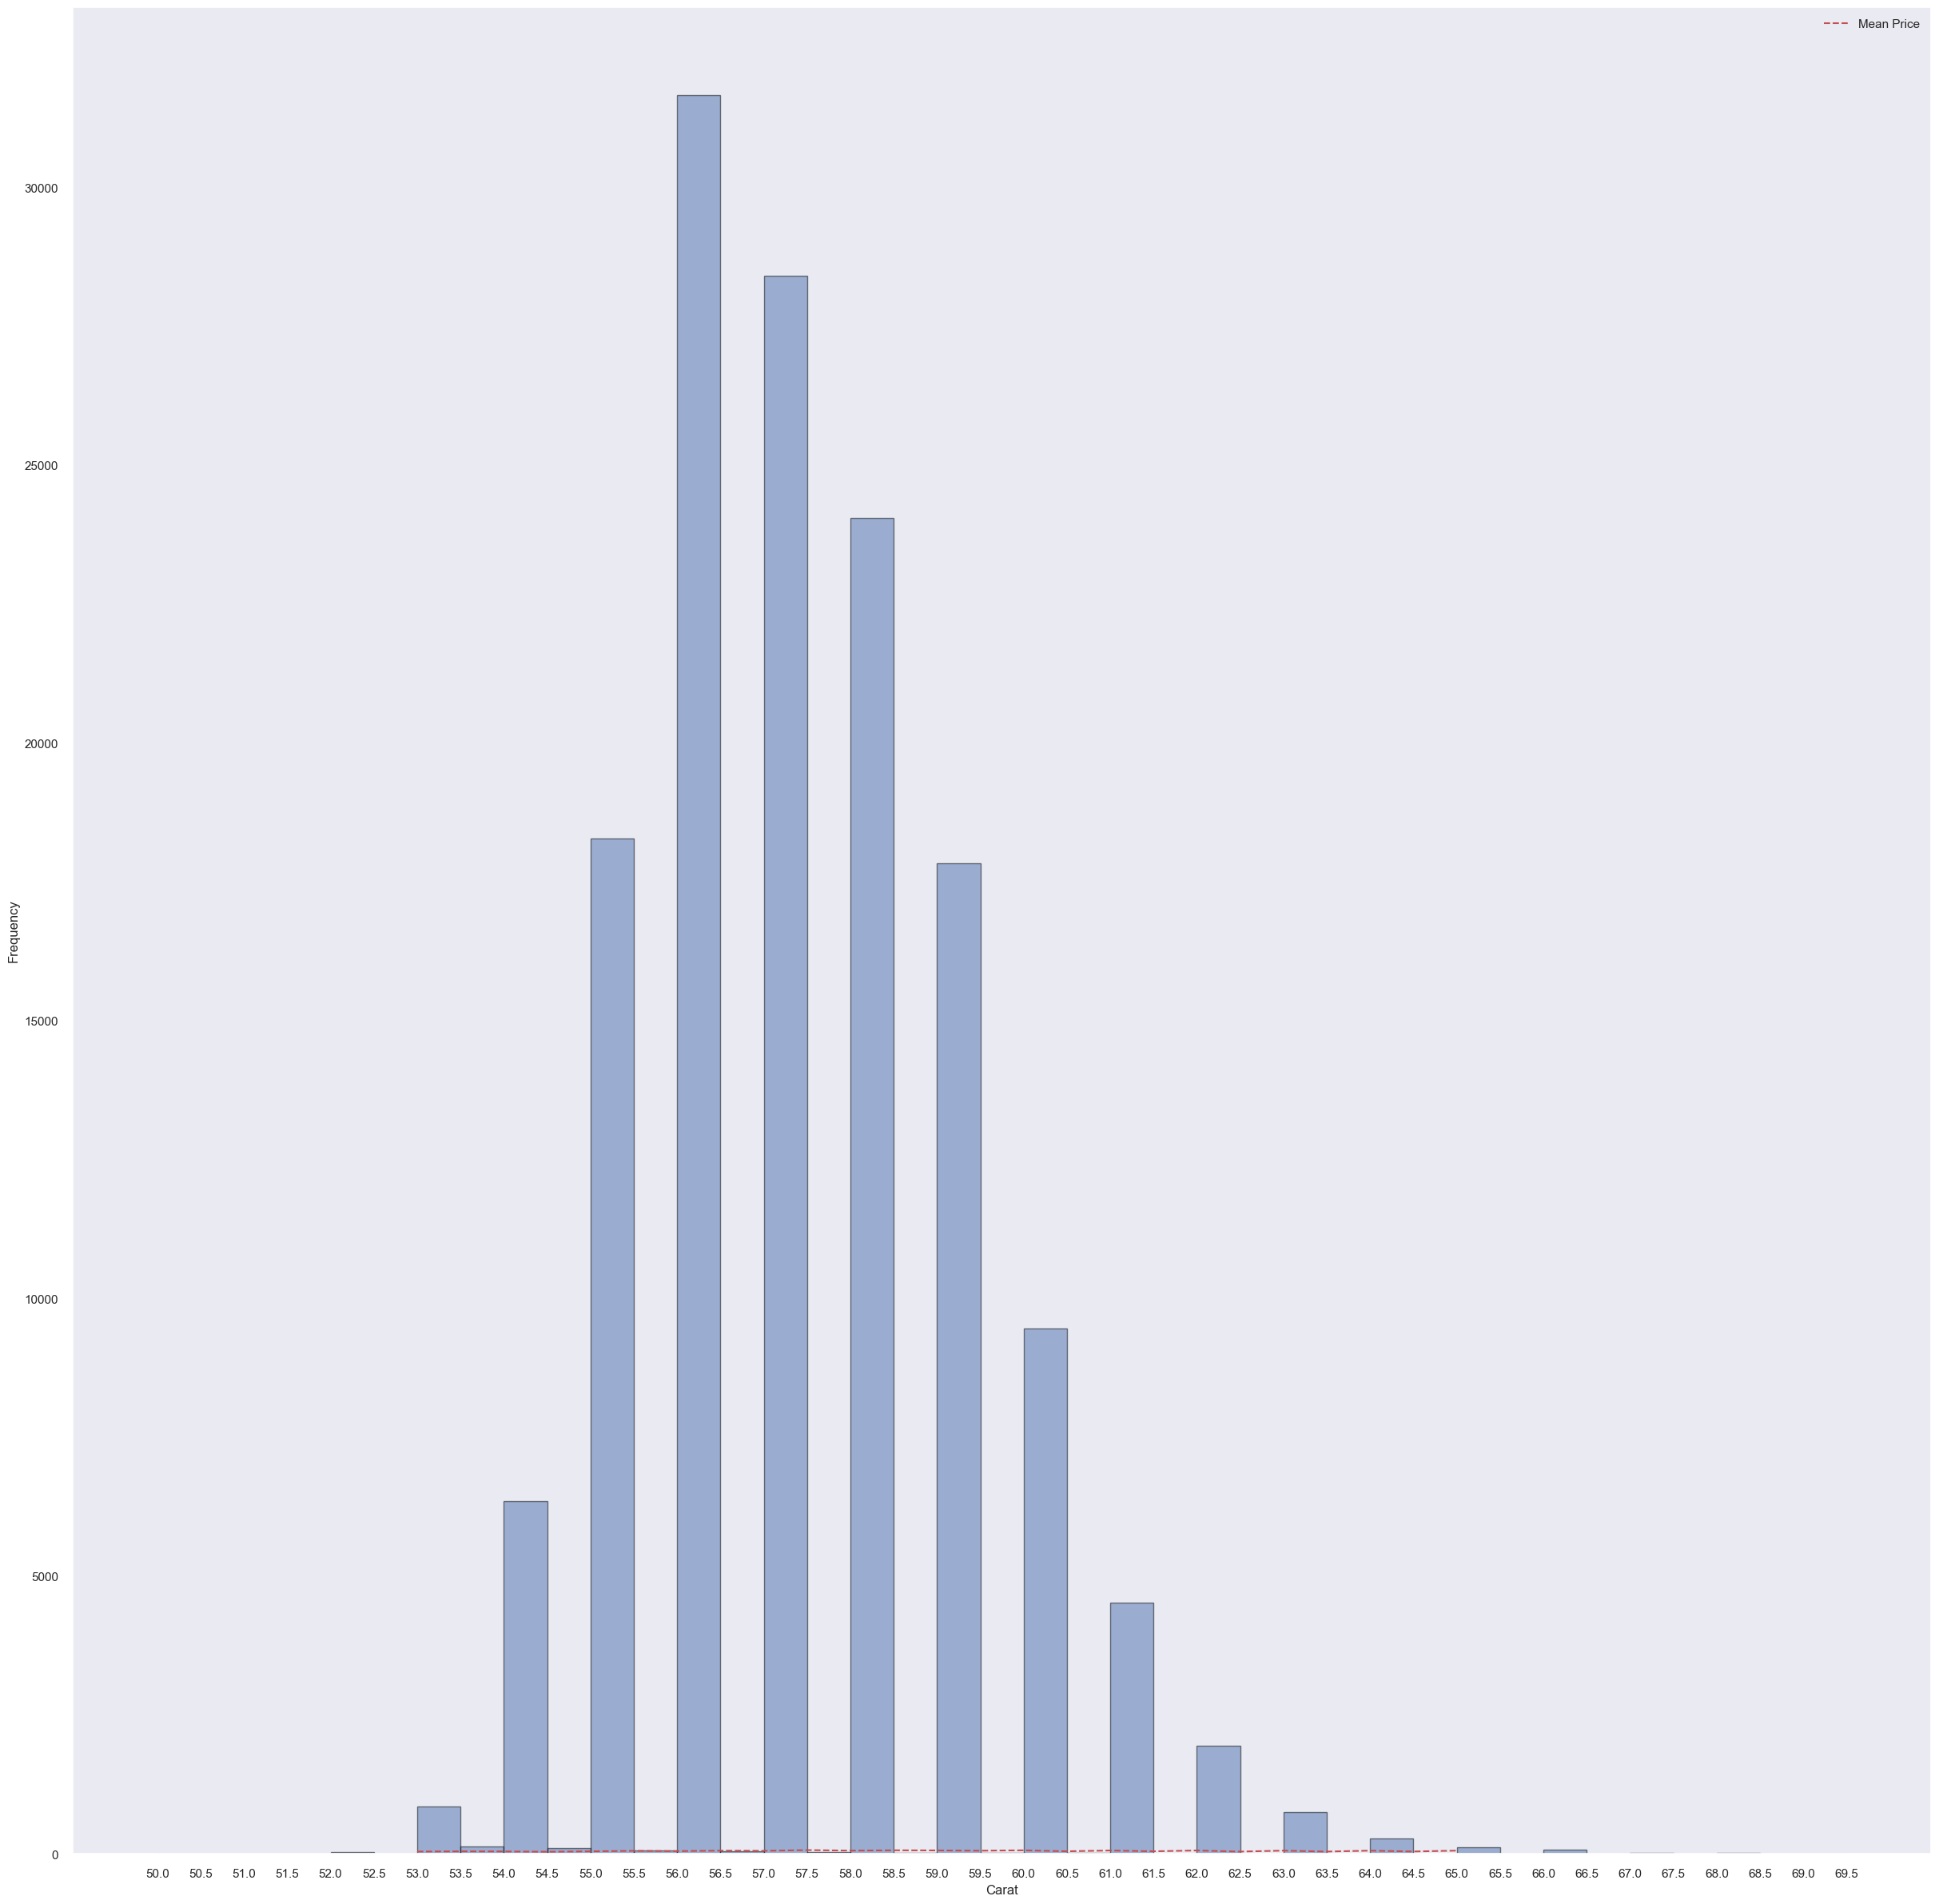

In [30]:
# задаем границы бинов
bin_edges = np.arange(50, 70, 0.5)

# создаем бины переменной carat
bins = pd.cut(train_data['table'], bins=bin_edges)

# вычисляем среднее значение price в каждом бине
mean_price = train_data.groupby(bins)['price'].mean()

# создаем новый график с размером 15x10
plt.figure(figsize=(30,30))

# выводим гистограмму
n, bins, patches = plt.hist(train_data['table'], bins=bin_edges, edgecolor='black', alpha=0.5   )

# добавляем график среднего значения price по каждому интервалу карата
plt.plot(bin_edges[1:], mean_price, 'r--', label='Mean Price')

# добавляем легенду
plt.legend()

# добавляем подписи к осям
plt.xlabel('Carat')
plt.ylabel('Frequency')

# форматируем ось x, чтобы отображать интервалы
plt.xticks(bins)

# Вставляем пунктирные линии на оси x в заданных точках
# plt.axvline(x=0.3, color='green', linestyle='--')
# plt.axvline(x=0.4, color='green', linestyle='--')
# plt.axvline(x=0.5, color='green', linestyle='--')
# plt.axvline(x=0.7, color='green', linestyle='--')
# plt.axvline(x=0.9, color='red', linestyle='--')
# plt.axvline(x=1, color='red', linestyle='--')
# plt.axvline(x=1.2, color='orange', linestyle='--')
# plt.axvline(x=1.5, color='green', linestyle='--')
# plt.axvline(x=2, color='green', linestyle='--')
# plt.axvline(x=2.5, color='green', linestyle='--')

# выводим график
plt.show()

<AxesSubplot: >

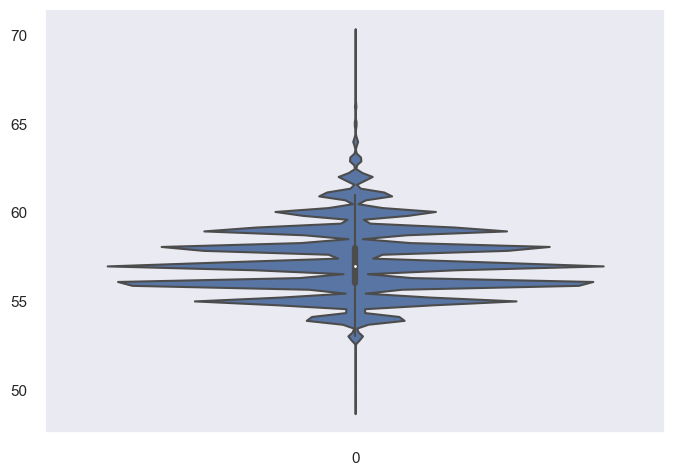

In [31]:
sns.violinplot(data = train_data['table'])

### В table встречаются много нецелых чисел, например 55.7, 55.2 и так далее.

#### И чтобы облегчить нашей будущей модели жизнь, я решил округлить table следующий образом:

#### Если остаток от деления на 1 равен 0 , оставляем как есть (66 - в 66), если он меньше или равен 3, тогда округляем вниз (66.3 - 66), если он больше 3 и меньше 8, округляем вниз и прибавляем 0.5 (то есть 66.4 - 66.5), иначе округляем в большую сторону (65.8 - 66)

#### Модель немного улучшилась от этого действия

In [32]:

def round_table_values(x):
    if x % 1 == 0:
        return x
    elif x % 1 <= 0.3:
        return np.floor(x)
    elif x % 1 > 0.3 and x % 1 <= 0.7:
        return np.floor(x) + 0.5
    else:
        return np.ceil(x)

# применяем функцию к колонке 'table' в dataframe 'train_data'
train_data['table'] = train_data['table'].apply(round_table_values)

In [33]:
# train_data['figsize'] = np.log(train_data['depth']*train_data['table'])
# train_data

# train['x_y'] = train_data['x']/train_data['y']
# train_data

Применим winsorize к колонкам содержащим "выбросы"

In [35]:
train_data_new = train_data.copy()
# создаем список с названиями колонок
cols = ['carat', 'depth', 'table', 'x', 'y', 'z']

# применяем метод Winsorize к каждой колонке
for col in cols:
    train_data_new[col] = winsorize(train_data_new[col], limits=(0.01, 0.01), inclusive=(True, True))

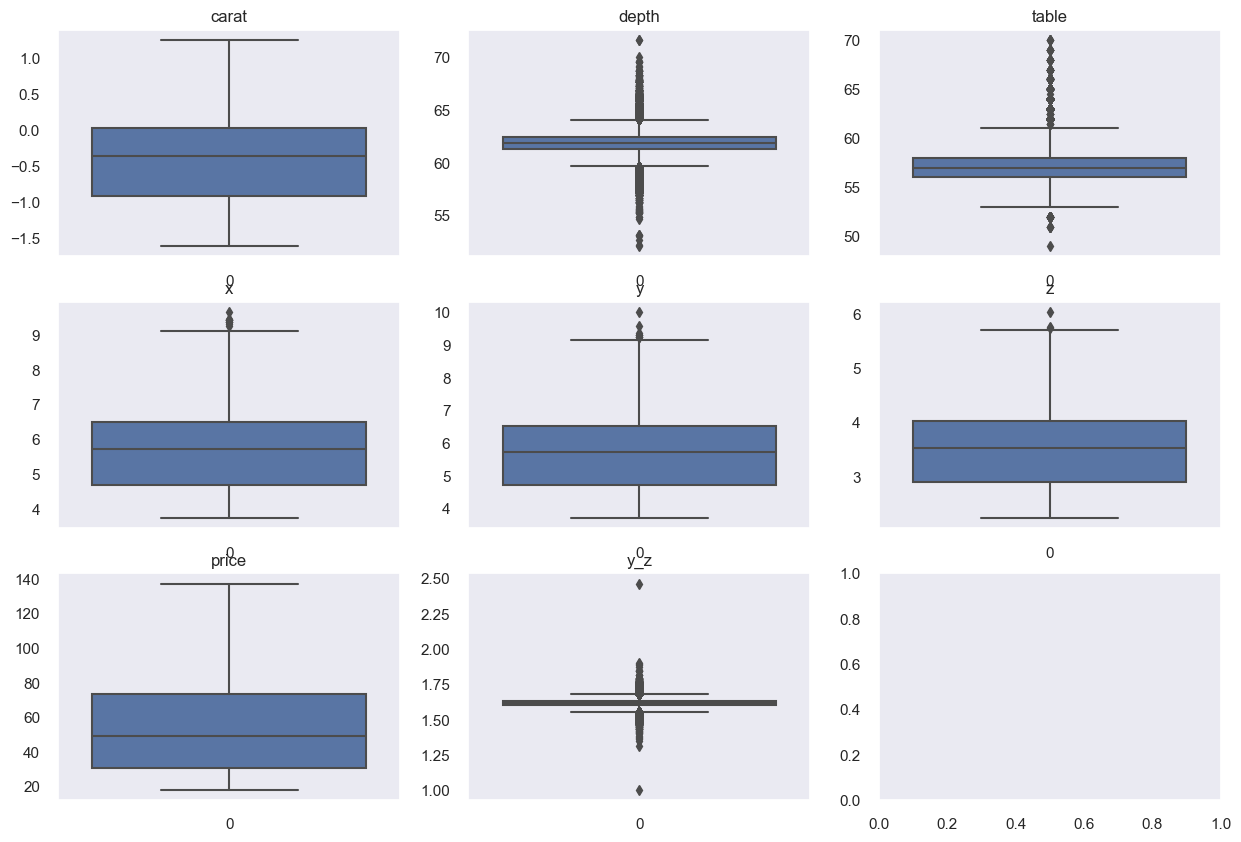

In [36]:
col_nums = 3  # how many plots per row
row_nums = math.ceil(len(train_data.select_dtypes(include=[np.number]).columns) / col_nums)  # how many rows of plots
# print(col_nums, row_nums)
_, axes = plt.subplots(nrows=row_nums, ncols=col_nums, figsize=(15,10))
for i, col in enumerate(train_data.select_dtypes(include=[np.number]).columns):
    sns.boxplot(data=train_data[col], ax=axes.flatten()[i]).set_title(col)
plt.show()

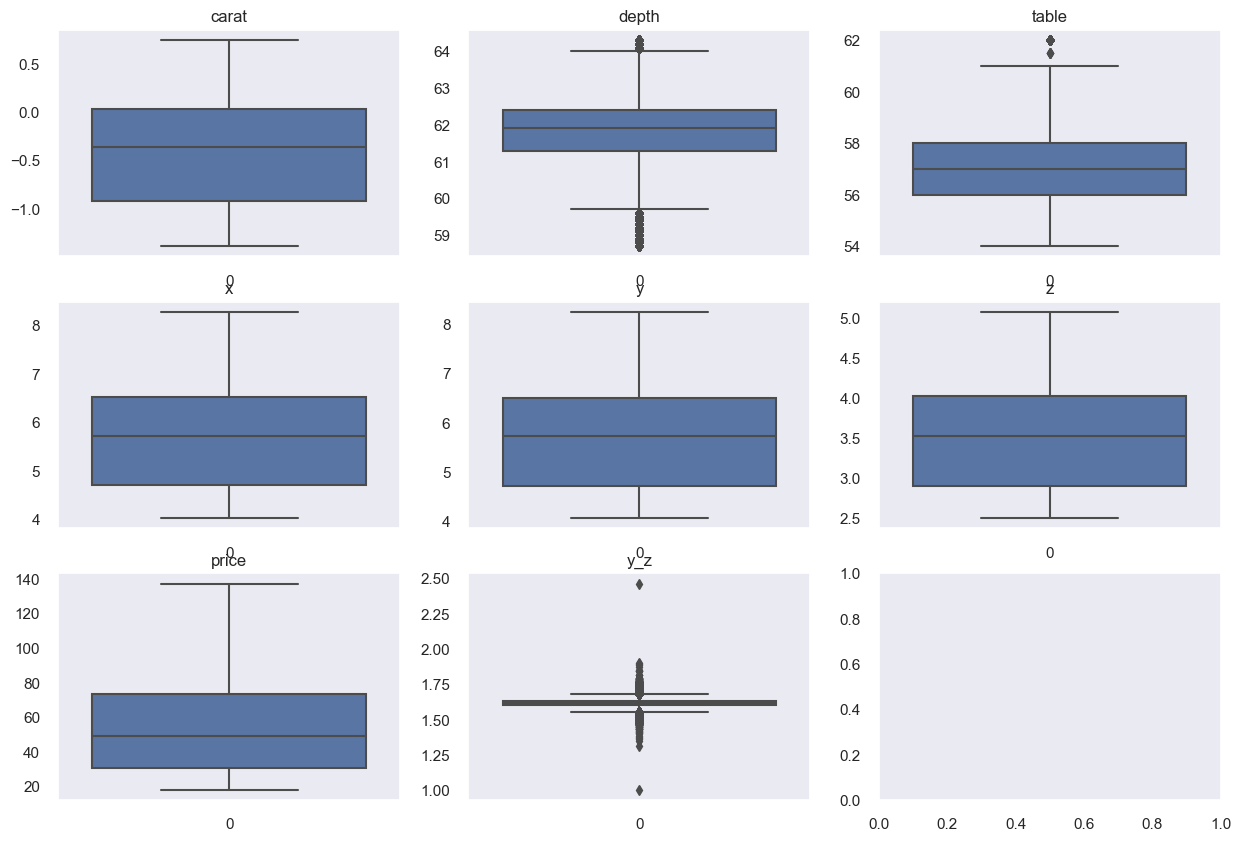

In [37]:
col_nums = 3  # how many plots per row
row_nums = math.ceil(len(train_data_new.select_dtypes(include=[np.number]).columns) / col_nums)  # how many rows of plots
# print(col_nums, row_nums)
_, axes = plt.subplots(nrows=row_nums, ncols=col_nums, figsize=(15,10))
for i, col in enumerate(train_data_new.select_dtypes(include=[np.number]).columns):
    sns.boxplot(data=train_data_new[col], ax=axes.flatten()[i]).set_title(col)
plt.show()

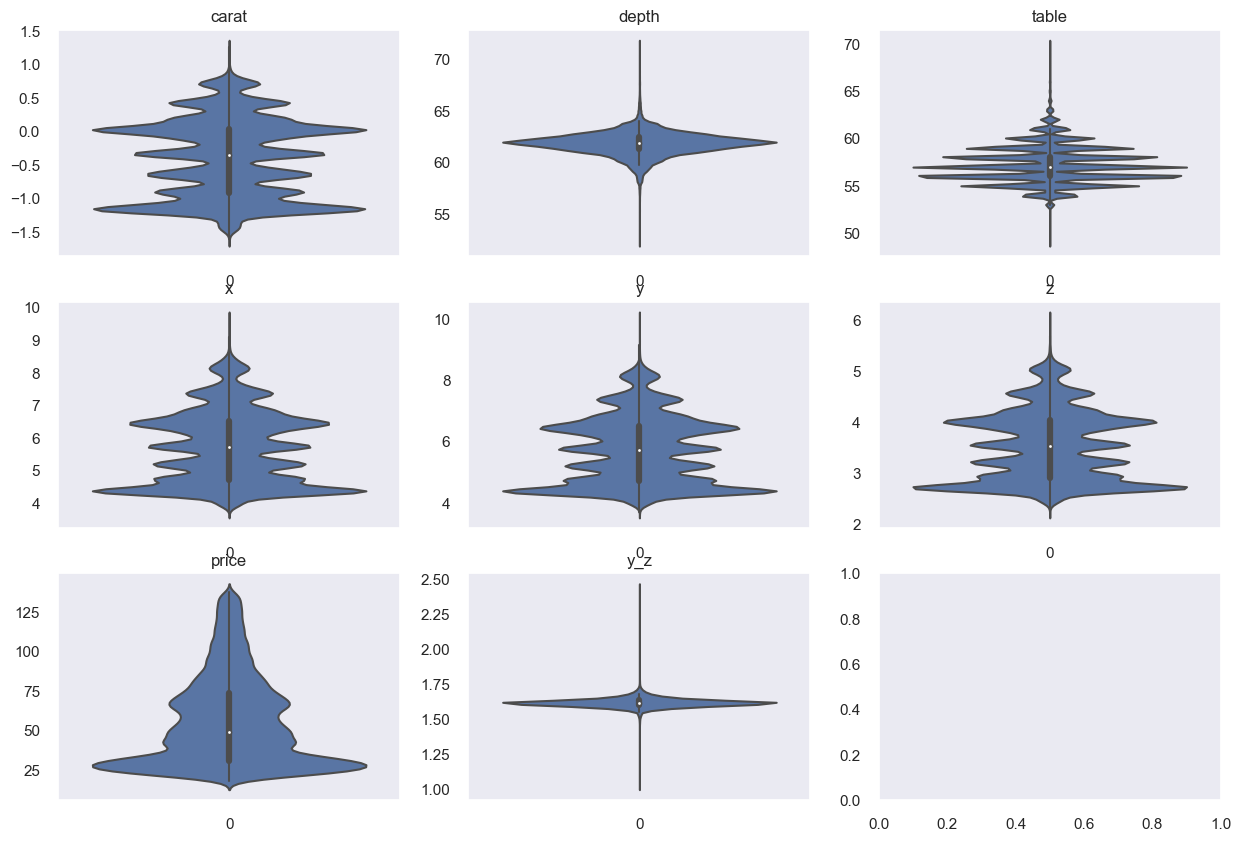

In [38]:
col_nums = 3  # how many plots per row
row_nums = math.ceil(len(train_data.select_dtypes(include=[np.number]).columns) / col_nums)  # how many rows of plots
# print(col_nums, row_nums)
_, axes = plt.subplots(nrows=row_nums, ncols=col_nums, figsize=(15,10))
for i, col in enumerate(train_data.select_dtypes(include=[np.number]).columns):
    sns.violinplot(data=train_data[col], ax=axes.flatten()[i]).set_title(col)
plt.show()

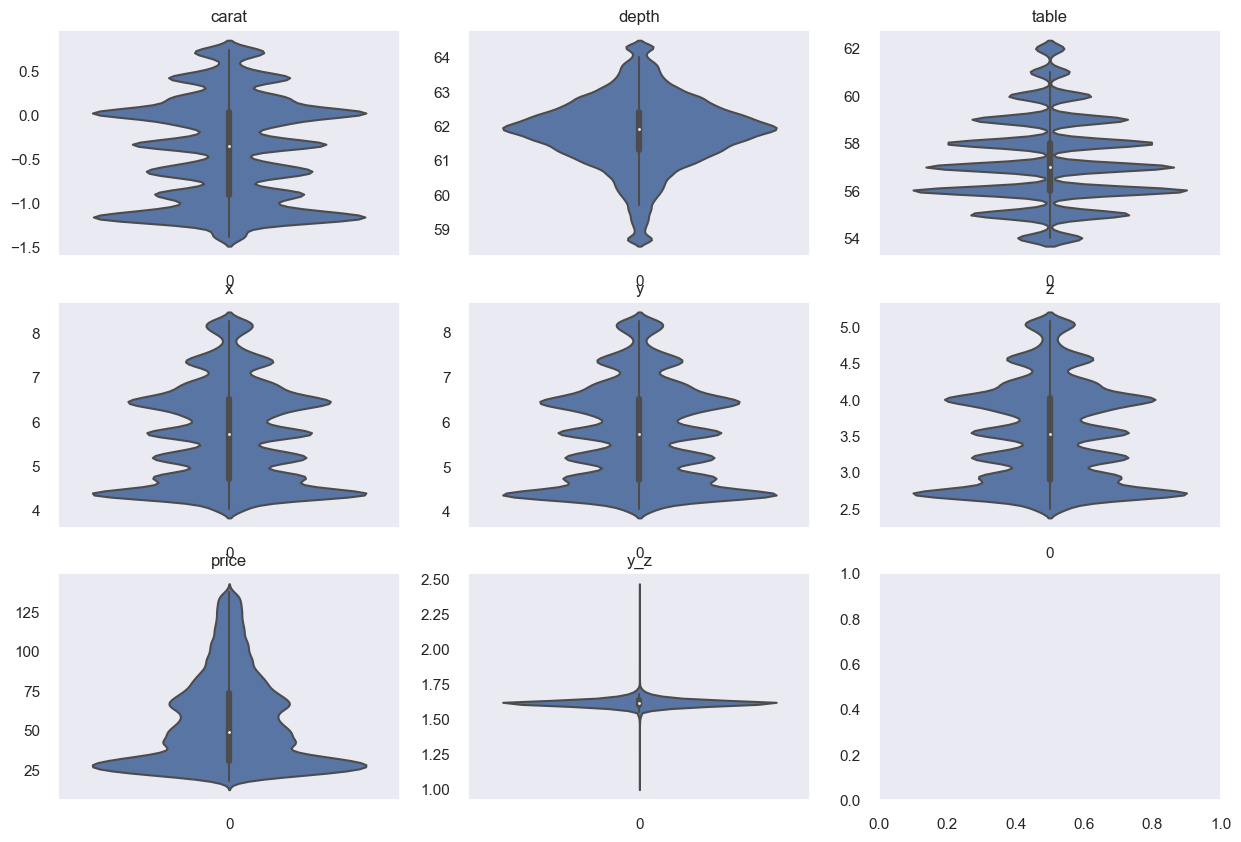

In [39]:

col_nums = 3  # how many plots per row
row_nums = math.ceil(len(train_data_new.select_dtypes(include=[np.number]).columns) / col_nums)  # how many rows of plots
# print(col_nums, row_nums)
_, axes = plt.subplots(nrows=row_nums, ncols=col_nums, figsize=(15,10))
for i, col in enumerate(train_data_new.select_dtypes(include=[np.number]).columns):
    sns.violinplot(data=train_data_new[col], ax=axes.flatten()[i]).set_title(col)
plt.show()

### Был проверен winsorize. Да, данные преобразуется в более удобной вид для работы модели. Да, были заметны незначительные улучшения модели на трейн данных. Однако, когда мы сделали winsorize для всего train_data (в финальной тетрадке), то увидели, что MSE на трейне 182000, а если без винзоризации 176000-177000. Получается, чем больше он данных перемасштабирует, тем больше он ухудшает модель.

### В следствии этого, было принято решения отказаться от winsorize.


### Начинаем самое интересное

In [40]:
X = train_data.drop(['price'],axis=1)
y = train_data['price']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [42]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z,y_z
71207,-1.171183,Ideal,H,VS2,61.9,56.0,4.36,4.32,2.68,1.611940
32643,-0.693147,Good,F,VS1,59.9,57.0,5.21,5.17,3.11,1.662379
88725,0.009950,Very Good,J,SI1,63.1,57.0,6.36,6.32,3.99,1.583960
56355,-0.941609,Premium,G,SI1,62.5,57.0,4.68,4.63,2.91,1.591065
54107,-0.653926,Ideal,E,VS2,61.4,57.0,5.19,5.22,3.19,1.636364
...,...,...,...,...,...,...,...,...,...,...
76547,0.438255,Very Good,G,VS2,61.0,56.0,7.49,7.46,4.56,1.635965
98250,-0.843970,Ideal,D,VS2,62.9,55.0,4.79,4.82,3.02,1.596026
103928,-1.171183,Ideal,F,VS2,62.1,54.0,4.34,4.37,2.70,1.618519
19972,0.463734,Ideal,G,VS2,62.2,55.0,7.54,7.45,4.67,1.595289


In [43]:
axis_features = ['x','y','z']
num_features = ['carat','depth','table','y_z']

axis_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=0, strategy='mean',add_indicator=False)),
    ('polynom', PolynomialFeatures(2,include_bias=False)),
    ('scaler', MinMaxScaler())])

clarity_map = [{
    'col':'clarity',##### Обратить внимание
    'mapping':{'FL':10, 'IF':9, 'VVS1':8, 'VVS2':7, 'VS1':6, 'VS2':5, 
               'SI1':4, 'SI2':3, 'I1':2, 'I2':1, 'I3':0}
    }]


clarity_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=clarity_map)),
    ('scaler', MinMaxScaler())
    ])
      
    
color_map = [{
    'col':'color',
    'mapping':{'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6}
    }]

color_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=color_map)),
    ('scaler', MinMaxScaler())
    ])

cut_map = [
    {'col':'cut',
    'mapping':{"Fair":0, "Good":1, "Very Good":2, "Premium":3,"Ideal":4}
    }]

cut_transformer = Pipeline(steps=[
    ('ce',ce.OrdinalEncoder(mapping=cut_map)),
    ('scaler', MinMaxScaler())
    ])
    

CT = ColumnTransformer([
        ("pol_std", axis_transformer, axis_features),
        ("num", MinMaxScaler(), num_features),
        ("ordinal_map_color", color_transformer, ['color']) ,
        ("ordinal_map_cut", cut_transformer, ['cut']) ,
        ("ordinal_map", clarity_transformer, ['clarity'])], 
#         ('carat_bin', MinMaxScaler(), ['carat_bin'])],
        remainder = 'passthrough')

display(CT)

res_ct = CT.fit_transform(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pol_std',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(missing_values=0)),
                                                 ('polynom',
                                                  PolynomialFeatures(include_bias=False)),
                                                 ('scaler', MinMaxScaler())]),
                                 ['x', 'y', 'z']),
                                ('num', MinMaxScaler(),
                                 ['carat', 'depth', 'table', 'y_z']),
                                ('ordinal_map_color',
                                 Pipeline(steps=[('ce',
                                                  OrdinalEncoder(mapping=[{'col':...
                                                  OrdinalEncoder(mapping=[{'col': 'cut',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Fair         0
Good         1
Very Good    2
Premium      3
Ideal        4
dtype: int64}])),
                                                 ('scaler', MinMaxScaler())]),
                                 ['cut']),
                                ('ordinal_map',
                                 Pipeline(steps=[('ce',
                                                  OrdinalEncoder(mapping=[{'col': 'clarity',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': FL      10
IF       9
VVS1     8
VVS2     7
VS1      6
VS2      5
SI1      4
SI2      3
I1       2
I2       1
I3       0
dtype: int64}])),
                                                 ('scaler', MinMaxScaler())]),
                                 ['clarity'])])

In [44]:
X_train_new = pd.DataFrame(res_ct, columns=['x', 'y', 'z', 'x^2', 'xy', 'xz', 'y^2', 'yz', 'z^2', 'carat', 
                                            'depth', 'table','y_z', 'cut', 'color',  'clarity'])


X_train_new.T

,0,1,2,3,4,5,6,7,8,9,...,108874,108875,108876,108877,108878,108879,108880,108881,108882,108883
x,0.103390,0.247458,0.442373,0.157627,0.244068,0.111864,0.335593,0.105085,0.530508,0.605085,...,0.113559,0.096610,0.325424,0.103390,0.108475,0.633898,0.176271,0.100000,0.642373,0.259322
y,0.095390,0.230525,0.413355,0.144674,0.238474,0.104928,0.324324,0.108108,0.497615,0.564388,...,0.106518,0.101749,0.317965,0.104928,0.103339,0.594595,0.174881,0.103339,0.593005,0.252782
z,0.116095,0.229551,0.461741,0.176781,0.250660,0.121372,0.343008,0.129288,0.519789,0.614776,...,0.126649,0.116095,0.337731,0.116095,0.105541,0.612137,0.205805,0.121372,0.641161,0.266491
x^2,0.062574,0.165464,0.333760,0.099164,0.162833,0.068120,0.237420,0.063678,0.420844,0.499872,...,0.069237,0.058182,0.228768,0.062574,0.065894,0.531718,0.112340,0.060373,0.541223,0.174752
xy,0.060803,0.161626,0.326660,0.096067,0.163569,0.066785,0.237165,0.065692,0.412948,0.488727,...,0.067880,0.060803,0.230040,0.064059,0.065148,0.521822,0.113733,0.062429,0.525526,0.175331
xz,0.064711,0.155582,0.340073,0.103607,0.162682,0.069180,0.237660,0.069645,0.412242,0.502495,...,0.071501,0.062555,0.231108,0.064711,0.062797,0.516613,0.120642,0.065379,0.537879,0.174827
y^2,0.055858,0.149262,0.302264,0.087985,0.155277,0.061902,0.223933,0.063936,0.383088,0.451757,...,0.062918,0.059878,0.218615,0.061902,0.060889,0.484164,0.108775,0.060889,0.482437,0.166251
yz,0.063016,0.154204,0.339333,0.101421,0.165814,0.068048,0.241555,0.071816,0.412706,0.501550,...,0.070374,0.065188,0.236369,0.066274,0.062189,0.517629,0.123364,0.067501,0.533308,0.178085
z^2,0.069067,0.148501,0.347841,0.110087,0.164581,0.072500,0.239732,0.077698,0.405398,0.506242,...,0.075959,0.069067,0.235227,0.069067,0.062278,0.503329,0.130899,0.072500,0.535722,0.176909
carat,0.153118,0.320135,0.565784,0.233327,0.333838,0.164211,0.442648,0.164211,0.628907,0.713165,...,0.164211,0.141662,0.437692,0.141662,0.141662,0.715426,0.267440,0.153118,0.724328,0.359730


In [45]:
res_ct_test = CT.transform(X_test)
X_test_new = pd.DataFrame(res_ct_test, columns=['x', 'y', 'z', 'x^2', 'xy', 'xz', 'y^2', 'yz', 'z^2', 'carat', 
                                            'depth', 'table', 'cut', 'color',  'clarity','figsize'])
X_test_new

,x,y,z,x^2,xy,xz,y^2,yz,z^2,carat,depth,table,cut,color,clarity,figsize
0,0.322034,0.313196,0.337731,0.225904,0.226507,0.229692,0.214652,0.234229,0.235227,0.437692,0.517949,0.285714,0.420235,1.000000,1.00,0.571429
1,0.103390,0.109698,0.121372,0.062574,0.065687,0.066465,0.064956,0.069689,0.072500,0.153118,0.492308,0.380952,0.431800,0.500000,1.00,0.285714
2,0.437288,0.411765,0.467018,0.328945,0.323512,0.340212,0.300801,0.341082,0.352946,0.562308,0.579487,0.428571,0.390796,0.500000,0.25,0.285714
3,0.494915,0.461049,0.482850,0.384852,0.375950,0.375681,0.347214,0.374313,0.368414,0.598769,0.461538,0.333333,0.427136,0.000000,1.00,0.571429
4,0.138983,0.141494,0.158311,0.086294,0.088590,0.090736,0.085845,0.093704,0.097246,0.205362,0.502564,0.428571,0.424875,0.666667,0.75,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36290,0.450847,0.424483,0.461741,0.341837,0.336177,0.344085,0.312566,0.344992,0.347841,0.569226,0.523077,0.428571,0.409963,0.833333,0.75,0.285714
36291,0.352542,0.341812,0.343008,0.252041,0.252316,0.244780,0.238746,0.249444,0.239732,0.452354,0.435897,0.333333,0.448854,0.666667,0.50,0.714286
36292,0.630508,0.588235,0.606860,0.527933,0.516246,0.511774,0.477272,0.510928,0.497523,0.710888,0.461538,0.380952,0.432505,0.500000,1.00,0.571429
36293,0.242373,0.238474,0.226913,0.161522,0.162919,0.152664,0.155277,0.156297,0.146519,0.333838,0.379487,0.619048,0.466472,0.500000,0.75,0.571429


#### Дальше начинается большое количество попыток найти лучшие параметры. Но для начала я воспользовался compare_model(), который показал мне, что лучшие модели на кросс-валидации это RandomForestRegressor и GradientBoostingRegressor (но и, конечно, catboost, lightboost, xgboost)

In [46]:
# # Заменены нули и highvalue, выбросы удалены НО ЧУТЬ ЧУТЬ, логарифмирование не проведено. Random_state = 42

# pipe_1 = Pipeline([('preprocessing', CT),
#                 ('regression', RandomForestRegressor())])
# pipe_1.fit(X_train, y_train)
# y_pred_1 = pipe_1.predict(X_test)
# print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
# print("Test:",mean_squared_error(y_test, y_pred_1))

# print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
# print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

In [47]:
# # Заменены нули и highvalue, выбросы удалены НО ЧУТЬ ЧУТЬ, логарифмирование не проведено. Random_state = 42

# pipe_1 = Pipeline([('preprocessing', CT),
#                 ('regression', RandomForestRegressor())])
# pipe_1.fit(X_train, y_train)
# y_pred_1 = pipe_1.predict(X_test)
# print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
# print("Test:",mean_squared_error(y_test, y_pred_1))

# print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
# print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

In [48]:
# ## ЛУЧШАЯ СБОРКА РАНДОМ ФОРЕСТА
# max_features = round(X_train_new.shape[1]/3)
# max_features

# pipe_1 = Pipeline([('preprocessing', CT),
#                 ('regression', RandomForestRegressor(max_features = 13, min_samples_leaf = 5, n_estimators = 150
#                                                     , criterion = 'friedman_mse', min_samples_split = 3,
#                                                     n_jobs = -1))])
# pipe_1.fit(X_train, y_train)
# y_pred_1 = pipe_1.predict(X_test)
# print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
# print("Test:",mean_squared_error(y_test, y_pred_1))

# print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
# print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

In [49]:
# # max_features = round(X_train_new.shape[1]/3)
# # max_features

# pipe_1 = Pipeline([('preprocessing', CT),
#                 ('regression', KNeighborsRegressor(n_neighbors = 6, p = 1))])
# pipe_1.fit(X_train, y_train)
# y_pred_1 = pipe_1.predict(X_test)
# print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
# print("Test:",mean_squared_error(y_test, y_pred_1))

# print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
# print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

In [50]:
# # Пробуем с биннингом и вау модель показала 0.78

# pipe_1 = Pipeline([('preprocessing', CT),
#                 ('regression', RandomForestRegressor(max_features = 13, min_samples_leaf = 5, n_estimators = 150
#                                                     ,criterion = 'friedman_mse', min_samples_split = 3,
#                                                     n_jobs = -1,random_state = 42))])
# pipe_1.fit(X_train, y_train)
# y_pred_1 = pipe_1.predict(X_test)
# print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
# print("Test:",mean_squared_error(y_test, y_pred_1))

# print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
# print("Test:",mean_absolute_percentage_error(y_test, y_pred_1))

In [51]:
# # Пробуем с StandardScaler для price

# pipe_1 = Pipeline([('preprocessing', CT),
#                 ('regression', RandomForestRegressor(max_features = 13, min_samples_leaf = 5, n_estimators = 150
#                                                     ,criterion = 'friedman_mse', min_samples_split = 3,
#                                                     n_jobs = -1))])
# pipe_1.fit(X_train, y_train)
# y_pred_1 = scaler.inverse_transform(pipe_1.predict(X_test).reshape(-1,1))

# print("Train:",mean_squared_error(scaler.inverse_transform(y_train.values.reshape(-1,1)), scaler.inverse_transform(pipe_1.predict(X_train).reshape(-1,1))))
# print("Test:",mean_squared_error(scaler.inverse_transform(y_test.values.reshape(-1,1)), y_pred_1))

# print("Train:",mean_absolute_percentage_error(scaler.inverse_transform(y_train.values.reshape(-1,1)), scaler.inverse_transform(pipe_1.predict(X_train).reshape(-1,1))))
# print("Test:",mean_absolute_percentage_error(scaler.inverse_transform(y_test.values.reshape(-1,1)), y_pred_1))

In [52]:
# # Пробуем с MinMaxScaler для price. В среднем лучше, чем StandardScaler

# pipe_1 = Pipeline([('preprocessing', CT),
#                 ('regression', RandomForestRegressor(max_features = 13, min_samples_leaf = 5, n_estimators = 150
#                                                     ,criterion = 'friedman_mse', min_samples_split = 3,
#                                                     n_jobs = -1))])
# pipe_1.fit(X_train, y_train)
# y_pred_1 = scaler.inverse_transform(pipe_1.predict(X_test).reshape(-1,1))

# print("Train:",mean_squared_error(scaler.inverse_transform(y_train.values.reshape(-1,1)), scaler.inverse_transform(pipe_1.predict(X_train).reshape(-1,1))))
# print("Test:",mean_squared_error(scaler.inverse_transform(y_test.values.reshape(-1,1)), y_pred_1))

# print("Train:",mean_absolute_percentage_error(scaler.inverse_transform(y_train.values.reshape(-1,1)), scaler.inverse_transform(pipe_1.predict(X_train).reshape(-1,1))))
# print("Test:",mean_absolute_percentage_error(scaler.inverse_transform(y_test.values.reshape(-1,1)), y_pred_1))

In [53]:
# # Пробуем брать квадрат от price. Но округлили Table еще

# pipe_1 = Pipeline([('preprocessing', CT),
#                 ('regression', RandomForestRegressor(max_features = 13, min_samples_leaf = 5, n_estimators = 150
#                                                     ,criterion = 'friedman_mse', min_samples_split = 3,
#                                                     n_jobs = -1, random_state = 42))])
# pipe_1.fit(X_train, y_train)
# y_pred_1 = np.square(pipe_1.predict(X_test))

# print("Train:",mean_squared_error(np.square(y_train), np.square(pipe_1.predict(X_train))))
# print("Test:",mean_squared_error(np.square(y_test), y_pred_1))

# print("Train:",mean_absolute_percentage_error(np.square(y_train), np.square(pipe_1.predict(X_train))))
# print("Test:",mean_absolute_percentage_error(np.square(y_test), y_pred_1))

## Остатки нормальных моделей

In [54]:
# Пробуем брать квадрат от price. Но округлили Table еще. RandomForest

for i in np.arange(1,50,5):
    print(i)
    pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', RandomForestRegressor(max_features = 13, min_samples_leaf = 5, n_estimators = 150
                                                    ,criterion = 'friedman_mse', min_samples_split = 3,
                                                    n_jobs = -1, random_state = i))])
    pipe_1.fit(X_train, y_train)
    y_pred_1 = np.square(pipe_1.predict(X_test))

    print("Train:",mean_squared_error(np.square(y_train), np.square(pipe_1.predict(X_train))))
    print("Test:",mean_squared_error(np.square(y_test), y_pred_1))

    print("Train:",mean_absolute_percentage_error(np.square(y_train), np.square(pipe_1.predict(X_train))))
    print("Test:",mean_absolute_percentage_error(np.square(y_test), y_pred_1))

1
Train: 178728.576386532
Test: 351618.6636894546
Train: 0.05572834799381044
Test: 0.07950275259813502
6
Train: 178943.0150220923
Test: 351175.64969933016
Train: 0.05572410506272195
Test: 0.07942667110399905
11
Train: 178846.20177232308
Test: 351905.2434116298
Train: 0.05572786835098086
Test: 0.07951921519958541
16
Train: 179231.3491079406
Test: 350955.11219408945
Train: 0.05571685589812728
Test: 0.07945145642689487
21
Train: 178503.88389573904
Test: 351274.80575059995
Train: 0.055685178061919555
Test: 0.07944178825933776
26
Train: 178508.3635870544
Test: 351211.4517553233
Train: 0.05570699071494758
Test: 0.07947974643372963
31
Train: 178567.7040208867
Test: 351094.9942235225
Train: 0.055705435150683165
Test: 0.07944270548057637
36
Train: 178637.23957979196
Test: 350558.6968419425
Train: 0.05569777219251569
Test: 0.0795084746158754
41
Train: 178646.081200305
Test: 350530.79771964304
Train: 0.05569443694498387
Test: 0.07946360834546998
46
Train: 178660.63578591056
Test: 350999.969967586

In [55]:
# Пробуем брать квадрат от price. Но округлили Table еще

pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', GradientBoostingRegressor(learning_rate = 0.1, subsample = 1, n_estimators = 100))])
pipe_1.fit(X_train, y_train)
y_pred_1 = np.square(pipe_1.predict(X_test))

print("Train:",mean_squared_error(np.square(y_train), np.square(pipe_1.predict(X_train))))
print("Test:",mean_squared_error(np.square(y_test), y_pred_1))

print("Train:",mean_absolute_percentage_error(np.square(y_train), np.square(pipe_1.predict(X_train))))
print("Test:",mean_absolute_percentage_error(np.square(y_test), y_pred_1))

Train: 367700.2841270248
Test: 374880.7976896084
Train: 0.08678437444138205
Test: 0.08760198952052406


In [56]:
pipeline_best = Pipeline([('preprocessing', CT),
                ('regression', RandomForestRegressor(max_features = 13, min_samples_leaf = 5, n_estimators = 150
                                                    ,criterion = 'friedman_mse', min_samples_split = 3,
                                                    n_jobs = -1))])


pipeline_best.fit(X_train, y_train)
y_pred_1 = np.square(pipeline_best.predict(X_test))

print("Train:",mean_squared_error(np.square(y_train), np.square(pipeline_best.predict(X_train))))
print("Test:",mean_squared_error(np.square(y_test), y_pred_1))

print("Train:",mean_absolute_percentage_error(np.square(y_train), np.square(pipeline_best.predict(X_train))))
print("Test:",mean_absolute_percentage_error(np.square(y_test), y_pred_1))

Train: 178256.2037573419
Test: 350279.51119137584
Train: 0.05568668852163007
Test: 0.07945713672669152


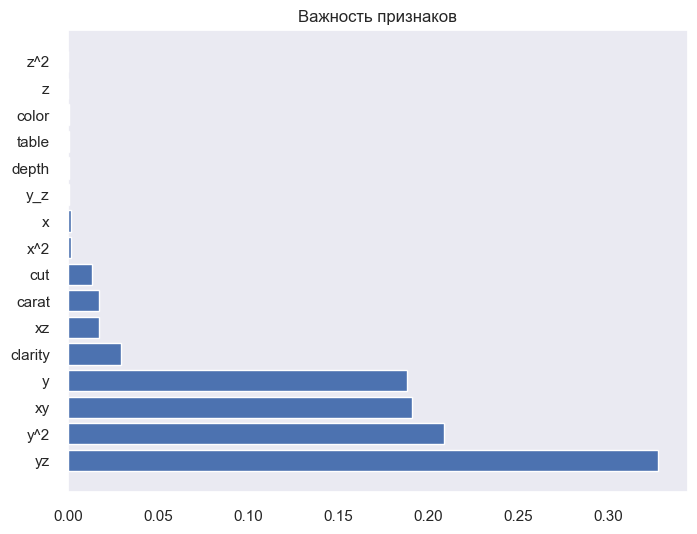

In [58]:
columns =['x', 'y', 'z', 'x^2', 'xy', 'xz', 'y^2', 'yz', 'z^2', 'carat', 
                                            'depth', 'table','y_z', 'cut', 'color',  'clarity']
importance = np.sort(pipe_1['regression'].feature_importances_)
importance_name = np.argsort(pipe_1['regression'].feature_importances_)
feature_names = columns

plt.figure(figsize=(8, 6))
plt.barh(width=importance, y=[feature_names[i] for i in importance_name])
# plt.barh(width=importance, y =  )
ax = plt.gca()
ax.invert_yaxis()
plt.title("Важность признаков")
plt.show()

### Всякие еще прикольные модели

In [59]:

# Пробуем брать квадрат от price. ПРОБУЕМ ОБЫЧНОЕ ДЕРЕВО

pipe_1 = Pipeline([('preprocessing', CT),
                ('regression', DecisionTreeRegressor(max_depth = 9, min_samples_leaf = 3))])
pipe_1.fit(X_train, y_train)
y_pred_1 = np.square(pipe_1.predict(X_test))

print("Train:",mean_squared_error(np.square(y_train), np.square(pipe_1.predict(X_train))))
print("Test:",mean_squared_error(np.square(y_test), y_pred_1))

print("Train:",mean_absolute_percentage_error(np.square(y_train), np.square(pipe_1.predict(X_train))))
print("Test:",mean_absolute_percentage_error(np.square(y_test), y_pred_1))

Train: 370977.52406580077
Test: 403467.1692089692
Train: 0.08854693068230456
Test: 0.0918492001277167


In [60]:
pipe_1 = Pipeline([
    ('scaler', CT),
    ('regressor', CatBoostRegressor(iterations=1000, learning_rate=0.01, depth=10, loss_function='RMSE', random_seed=42))
])

pipe_1.fit(X_train,y_train)
y_pred_1 = np.square(pipe_1.predict(X_test))
print("Train:",mean_squared_error(np.square(y_train), np.square(pipe_1.predict(X_train))))
print("Test:",mean_squared_error(np.square(y_test), y_pred_1))

print("Train:",mean_absolute_percentage_error(np.square(y_train), np.square(pipe_1.predict(X_train))))
print("Test:",mean_absolute_percentage_error(np.square(y_test), y_pred_1))

0:	learn: 28.6552681	total: 167ms	remaining: 2m 46s
1:	learn: 28.3858657	total: 196ms	remaining: 1m 37s
2:	learn: 28.1135723	total: 226ms	remaining: 1m 15s
3:	learn: 27.8456328	total: 256ms	remaining: 1m 3s
4:	learn: 27.5839188	total: 285ms	remaining: 56.6s
5:	learn: 27.3200894	total: 315ms	remaining: 52.1s
6:	learn: 27.0591556	total: 345ms	remaining: 48.9s
7:	learn: 26.8033900	total: 374ms	remaining: 46.4s
8:	learn: 26.5490808	total: 407ms	remaining: 44.8s
9:	learn: 26.2959617	total: 437ms	remaining: 43.3s
10:	learn: 26.0454166	total: 467ms	remaining: 42s
11:	learn: 25.7971437	total: 499ms	remaining: 41.1s
12:	learn: 25.5529827	total: 531ms	remaining: 40.3s
13:	learn: 25.3083786	total: 561ms	remaining: 39.5s
14:	learn: 25.0674261	total: 592ms	remaining: 38.9s
15:	learn: 24.8305406	total: 623ms	remaining: 38.3s
16:	learn: 24.5944638	total: 655ms	remaining: 37.9s
17:	learn: 24.3637107	total: 687ms	remaining: 37.5s
18:	learn: 24.1344421	total: 707ms	remaining: 36.5s
19:	learn: 23.9064582

161:	learn: 7.0380403	total: 5.24s	remaining: 27.1s
162:	learn: 6.9885084	total: 5.27s	remaining: 27s
163:	learn: 6.9394384	total: 5.3s	remaining: 27s
164:	learn: 6.8911180	total: 5.33s	remaining: 27s
165:	learn: 6.8434666	total: 5.36s	remaining: 26.9s
166:	learn: 6.7954729	total: 5.39s	remaining: 26.9s
167:	learn: 6.7494391	total: 5.42s	remaining: 26.8s
168:	learn: 6.7026642	total: 5.45s	remaining: 26.8s
169:	learn: 6.6567312	total: 5.49s	remaining: 26.8s
170:	learn: 6.6115510	total: 5.52s	remaining: 26.8s
171:	learn: 6.5662848	total: 5.56s	remaining: 26.8s
172:	learn: 6.5214768	total: 5.59s	remaining: 26.7s
173:	learn: 6.4778633	total: 5.63s	remaining: 26.7s
174:	learn: 6.4348942	total: 5.67s	remaining: 26.7s
175:	learn: 6.3927737	total: 5.71s	remaining: 26.7s
176:	learn: 6.3506857	total: 5.75s	remaining: 26.7s
177:	learn: 6.3092298	total: 5.78s	remaining: 26.7s
178:	learn: 6.2681067	total: 5.82s	remaining: 26.7s
179:	learn: 6.2286368	total: 5.85s	remaining: 26.6s
180:	learn: 6.18865

325:	learn: 3.6246603	total: 10.7s	remaining: 22.1s
326:	learn: 3.6193158	total: 10.7s	remaining: 22.1s
327:	learn: 3.6141052	total: 10.7s	remaining: 22s
328:	learn: 3.6088052	total: 10.8s	remaining: 22s
329:	learn: 3.6036958	total: 10.8s	remaining: 21.9s
330:	learn: 3.5985621	total: 10.8s	remaining: 21.9s
331:	learn: 3.5936359	total: 10.9s	remaining: 21.9s
332:	learn: 3.5890170	total: 10.9s	remaining: 21.8s
333:	learn: 3.5840536	total: 10.9s	remaining: 21.8s
334:	learn: 3.5794670	total: 11s	remaining: 21.8s
335:	learn: 3.5748320	total: 11s	remaining: 21.7s
336:	learn: 3.5700868	total: 11s	remaining: 21.7s
337:	learn: 3.5654894	total: 11.1s	remaining: 21.7s
338:	learn: 3.5611692	total: 11.1s	remaining: 21.6s
339:	learn: 3.5568847	total: 11.1s	remaining: 21.6s
340:	learn: 3.5523464	total: 11.2s	remaining: 21.6s
341:	learn: 3.5482689	total: 11.2s	remaining: 21.5s
342:	learn: 3.5438841	total: 11.2s	remaining: 21.5s
343:	learn: 3.5396838	total: 11.3s	remaining: 21.5s
344:	learn: 3.5354961	

490:	learn: 3.2787437	total: 16.1s	remaining: 16.7s
491:	learn: 3.2781250	total: 16.2s	remaining: 16.7s
492:	learn: 3.2774822	total: 16.2s	remaining: 16.7s
493:	learn: 3.2768085	total: 16.2s	remaining: 16.6s
494:	learn: 3.2762501	total: 16.3s	remaining: 16.6s
495:	learn: 3.2755848	total: 16.3s	remaining: 16.6s
496:	learn: 3.2749590	total: 16.3s	remaining: 16.5s
497:	learn: 3.2743327	total: 16.4s	remaining: 16.5s
498:	learn: 3.2737035	total: 16.4s	remaining: 16.5s
499:	learn: 3.2730823	total: 16.4s	remaining: 16.4s
500:	learn: 3.2724395	total: 16.5s	remaining: 16.4s
501:	learn: 3.2718468	total: 16.5s	remaining: 16.4s
502:	learn: 3.2711619	total: 16.5s	remaining: 16.3s
503:	learn: 3.2706327	total: 16.6s	remaining: 16.3s
504:	learn: 3.2700682	total: 16.6s	remaining: 16.3s
505:	learn: 3.2695522	total: 16.6s	remaining: 16.2s
506:	learn: 3.2690404	total: 16.7s	remaining: 16.2s
507:	learn: 3.2684898	total: 16.7s	remaining: 16.2s
508:	learn: 3.2678888	total: 16.7s	remaining: 16.1s
509:	learn: 

651:	learn: 3.2173015	total: 21.2s	remaining: 11.3s
652:	learn: 3.2171148	total: 21.3s	remaining: 11.3s
653:	learn: 3.2168570	total: 21.3s	remaining: 11.3s
654:	learn: 3.2166490	total: 21.3s	remaining: 11.2s
655:	learn: 3.2164238	total: 21.4s	remaining: 11.2s
656:	learn: 3.2162420	total: 21.4s	remaining: 11.2s
657:	learn: 3.2160001	total: 21.4s	remaining: 11.1s
658:	learn: 3.2157852	total: 21.5s	remaining: 11.1s
659:	learn: 3.2156112	total: 21.5s	remaining: 11.1s
660:	learn: 3.2153847	total: 21.5s	remaining: 11s
661:	learn: 3.2150777	total: 21.5s	remaining: 11s
662:	learn: 3.2148279	total: 21.6s	remaining: 11s
663:	learn: 3.2145352	total: 21.6s	remaining: 10.9s
664:	learn: 3.2143176	total: 21.6s	remaining: 10.9s
665:	learn: 3.2140258	total: 21.7s	remaining: 10.9s
666:	learn: 3.2138707	total: 21.7s	remaining: 10.8s
667:	learn: 3.2137140	total: 21.7s	remaining: 10.8s
668:	learn: 3.2134385	total: 21.8s	remaining: 10.8s
669:	learn: 3.2132055	total: 21.8s	remaining: 10.7s
670:	learn: 3.2130

811:	learn: 3.1865703	total: 26.4s	remaining: 6.11s
812:	learn: 3.1863897	total: 26.4s	remaining: 6.08s
813:	learn: 3.1863024	total: 26.5s	remaining: 6.05s
814:	learn: 3.1860826	total: 26.5s	remaining: 6.02s
815:	learn: 3.1858998	total: 26.5s	remaining: 5.98s
816:	learn: 3.1857973	total: 26.6s	remaining: 5.95s
817:	learn: 3.1856085	total: 26.6s	remaining: 5.92s
818:	learn: 3.1854947	total: 26.6s	remaining: 5.89s
819:	learn: 3.1853607	total: 26.7s	remaining: 5.86s
820:	learn: 3.1851900	total: 26.7s	remaining: 5.82s
821:	learn: 3.1850200	total: 26.7s	remaining: 5.79s
822:	learn: 3.1848353	total: 26.8s	remaining: 5.76s
823:	learn: 3.1846426	total: 26.8s	remaining: 5.72s
824:	learn: 3.1845024	total: 26.8s	remaining: 5.69s
825:	learn: 3.1843105	total: 26.9s	remaining: 5.66s
826:	learn: 3.1842291	total: 26.9s	remaining: 5.63s
827:	learn: 3.1840375	total: 26.9s	remaining: 5.59s
828:	learn: 3.1838895	total: 27s	remaining: 5.56s
829:	learn: 3.1837829	total: 27s	remaining: 5.53s
830:	learn: 3.18

973:	learn: 3.1633513	total: 31.9s	remaining: 851ms
974:	learn: 3.1631456	total: 31.9s	remaining: 818ms
975:	learn: 3.1629971	total: 31.9s	remaining: 785ms
976:	learn: 3.1628636	total: 32s	remaining: 752ms
977:	learn: 3.1628023	total: 32s	remaining: 720ms
978:	learn: 3.1626364	total: 32s	remaining: 687ms
979:	learn: 3.1625626	total: 32s	remaining: 654ms
980:	learn: 3.1623891	total: 32.1s	remaining: 621ms
981:	learn: 3.1622770	total: 32.1s	remaining: 589ms
982:	learn: 3.1620784	total: 32.1s	remaining: 556ms
983:	learn: 3.1619765	total: 32.2s	remaining: 523ms
984:	learn: 3.1618176	total: 32.2s	remaining: 490ms
985:	learn: 3.1617406	total: 32.2s	remaining: 458ms
986:	learn: 3.1616318	total: 32.3s	remaining: 425ms
987:	learn: 3.1615529	total: 32.3s	remaining: 392ms
988:	learn: 3.1614705	total: 32.3s	remaining: 360ms
989:	learn: 3.1613374	total: 32.4s	remaining: 327ms
990:	learn: 3.1612181	total: 32.4s	remaining: 294ms
991:	learn: 3.1611336	total: 32.4s	remaining: 261ms
992:	learn: 3.160876

## Как мы видим, catboost говорит на тесте MSE 328603 (ну может измениться при перезапуске). А это означает, что мы достигли идеала на RandomForest-е, потому что переплюнуть кэтбуст мы не сможем, а разница не большая. Оставляем выбранную модель с данными фичами. 


Вот здесь была сеточка, но как по мне она бесполезна для подбора параметров RF

In [61]:
# pipe = Pipeline([('preprocessing', CT),
#                 ('classifier', RandomForestRegressor(max_features='sqrt'))])

# n_estimators  = np.arange(50,700,50)
# min_samples_leaf = [1,2,3,5,7]
# # learning_rate = np.arange(0.01,0.2,0.02)
# # subsample= [0.1,0.5,1]

# param_grid = [
#     {'preprocessing': [CT],
#     'classifier': [RandomForestRegressor(max_features='sqrt')],
#      'classifier__n_estimators': n_estimators,
#      'classifier__min_samples_leaf': min_samples_leaf
# #      'classifier__learning_rate': learning_rate,
# #       'classifier__subsample': subsample
# #      'classifier__n_jobs': [-1] # задействовать все процессы
#     }
# ] #решетка

# # cross_val = StratifiedShuffleSplit(n_splits=3)
# # cross_val = StratifiedKFold(n_splits=5, shuffle=True)

# grid = GridSearchCV(pipe,param_grid, cv=5,
#                     return_train_score = True,
#                    n_jobs = -1, scoring = 'neg_mean_squared_error') # решетчатый поиск

# # for i in tqdm([1,2,3]):
# grid.fit(X_train, y_train)

In [62]:
# table=pd.DataFrame(grid.cv_results_)
# pv_table=table.pivot_table(index='param_classifier__n_estimators',columns='param_classifier__min_samples_leaf',values='mean_test_score')
# pv_table
# f, ax = plt.subplots(figsize=(9, 6))
# sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

In [63]:
# pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T

## Еще можно выполнить compare_models(), который считает по всем моделям регрессии оценку по всем метрикам по средней кросс-валидации на 10 фолдов, собственно после него я и выбрал RandomForest, т.к. он показал самый лучший результат

In [64]:
# !pip install autoviz
# !pip install --pre pycaret

In [65]:
y_train_val = y_train.values

In [66]:
y_train_val = np.square(y_train_val)

In [67]:
from pycaret.regression import *
setup(X_train_new,target=y_train_val ,session_id=42,train_size= 0.8)

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Regression
3,Original data shape,"(108884, 17)"
4,Transformed data shape,"(108884, 17)"
5,Transformed train set shape,"(87107, 17)"
6,Transformed test set shape,"(21777, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [68]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,298.5741,335206.7258,578.5928,0.9794,0.1088,0.0817,4.7330
lightgbm,Light Gradient Boosting Machine,301.9441,338427.1335,581.3772,0.9792,0.1117,0.0851,0.6480
xgboost,Extreme Gradient Boosting,305.5152,355233.1188,595.6212,0.9782,0.1094,0.0823,1.6220
rf,Random Forest Regressor,311.7509,370485.8953,608.4595,0.9772,0.1115,0.0826,9.2200
gbr,Gradient Boosting Regressor,333.2243,382028.0967,617.7561,0.9765,0.1328,0.0992,3.2580
et,Extra Trees Regressor,319.8321,386890.4459,621.7975,0.9762,0.1146,0.0848,5.2200
knn,K Neighbors Regressor,331.0356,413173.3781,642.5906,0.9746,0.1197,0.0892,0.8300
dt,Decision Tree Regressor,429.8278,711596.5969,843.2718,0.9563,0.1516,0.1107,0.5520
lr,Linear Regression,651.0741,976004.2625,987.7040,0.9400,0.5781,0.3340,1.0920
br,Bayesian Ridge,651.2621,977683.1188,988.5667,0.9399,0.5786,0.3340,0.4410


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

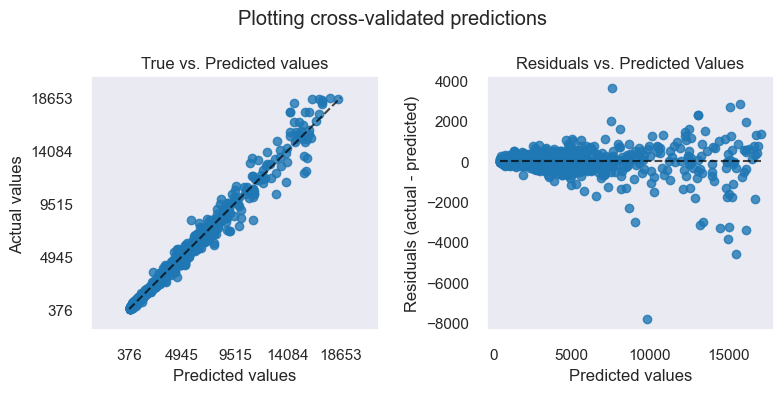

In [69]:



fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    np.square(y_test),
    y_pred=y_pred_1,
    kind="actual_vs_predicted",
    ax=axs[0],
)
axs[0].set_title("True vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    np.square(y_test),
    y_pred=y_pred_1,
    kind="residual_vs_predicted",
    ax=axs[1],
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show();